In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score

#
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Flatten, Dense


from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
#from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from scikeras.wrappers import KerasRegressor

# Load prepared data

In [3]:
save_path = "/Users/chikakoolsen/opt/python/thesis/code/tdcs_thesis/data/raw/"

## fmap mean all experiments

In [4]:
file_mean = save_path+"fmap_mean.txt"
columns_mean =['exp', 'mini_exp', 'i', 'j', 'k', 'mean0', 'mean1', 'mean2', 'mean3', 'mean4', 'theory']
data = np.loadtxt(file_mean);

In [5]:
df = pd.DataFrame(data, columns=columns_mean)
df = df.astype({"exp": int, "i": int, "j": int, "k": int, "mini_exp": int})
df

,exp,mini_exp,i,j,k,mean0,mean1,mean2,mean3,mean4,theory
0,36,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,36,1,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0
2,36,1,0,0,2,0.0,0.0,0.0,0.0,0.0,0.0
3,36,1,0,0,3,0.0,0.0,0.0,0.0,0.0,0.0
4,36,1,0,0,4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3244027,38,6,43,63,59,0.0,0.0,0.0,0.0,0.0,0.0
3244028,38,6,43,63,60,0.0,0.0,0.0,0.0,0.0,0.0
3244029,38,6,43,63,61,0.0,0.0,0.0,0.0,0.0,0.0
3244030,38,6,43,63,62,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3244032 entries, 0 to 3244031
Data columns (total 11 columns):
 #   Column    Dtype  
---  ------    -----  
 0   exp       int64  
 1   mini_exp  int64  
 2   i         int64  
 3   j         int64  
 4   k         int64  
 5   mean0     float64
 6   mean1     float64
 7   mean2     float64
 8   mean3     float64
 9   mean4     float64
 10  theory    float64
dtypes: float64(6), int64(5)
memory usage: 272.3 MB


## 55 fmap mean

In [7]:
arr = [4, 6, 8, 10, 12]
col = []
for i in range(len(arr)):
    for j in range(1, 12):
        name = str(arr[i])+'_'+str(j+1)+'m'+str(j)
        col.append(name)

In [8]:
file_name = save_path+"fmap_mean_55.txt"
columns = ['exp', 'mini_exp', 'i', 'j', 'k']
for i in range(len(col)): 
    columns.append(col[i])
columns.append('theory')
data = np.loadtxt(file_name);

In [9]:
df_55 = pd.DataFrame(data, columns=columns)
df_55 = df_55.astype({"exp": int, "i": int, "j": int, "k": int, "mini_exp": int})
df_55

,exp,mini_exp,i,j,k,4_2m1,4_3m2,4_4m3,4_5m4,4_6m5,...,12_4m3,12_5m4,12_6m5,12_7m6,12_8m7,12_9m8,12_10m9,12_11m10,12_12m11,theory
0,36,1,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,36,1,0,0,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,36,1,0,0,2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,36,1,0,0,3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,36,1,0,0,4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3244027,38,6,43,63,59,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3244028,38,6,43,63,60,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3244029,38,6,43,63,61,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3244030,38,6,43,63,62,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Split data

## Data 1. fmap mean all experiments

In [10]:
X = df.iloc[:, 5:-1].values 
y = df['theory'].values

X1_train, X1_test, y1_train, y1_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [11]:
print(X.shape)
print(y.shape)
print(X1_train.shape)
print(y1_train.shape)
print(X1_test.shape)
print(y1_test.shape)

(3244032, 5)
(3244032,)
(2270822, 5)
(2270822,)
(973210, 5)
(973210,)


## Data2: One experiment

In [12]:
df_train = df[(df['exp']==38) & (df['mini_exp']!=6)]
df_test = df[(df['exp']==38) & (df['mini_exp']==6)]

In [13]:
df_train.iloc[:, 5:-1]

,mean0,mean1,mean2,mean3,mean4
2162688,0.0,0.0,0.0,0.0,0.0
2162689,0.0,0.0,0.0,0.0,0.0
2162690,0.0,0.0,0.0,0.0,0.0
2162691,0.0,0.0,0.0,0.0,0.0
2162692,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
3063803,0.0,0.0,0.0,0.0,0.0
3063804,0.0,0.0,0.0,0.0,0.0
3063805,0.0,0.0,0.0,0.0,0.0
3063806,0.0,0.0,0.0,0.0,0.0


In [14]:
X2_train = df_train.iloc[:, 5:-1].values
y2_train = df_train['theory'].values

X2_test = df_test.iloc[:, 5:-1].values
y2_test = df_test['theory'].values

In [15]:
print(X2_train.shape)
print(y2_train.shape)
print(X2_test.shape)
print(y2_test.shape)

(901120, 5)
(901120,)
(180224, 5)
(180224,)


## Data3: 55 fmap mean

In [16]:
df_55.iloc[:, 5:-1]

,4_2m1,4_3m2,4_4m3,4_5m4,4_6m5,4_7m6,4_8m7,4_9m8,4_10m9,4_11m10,...,12_3m2,12_4m3,12_5m4,12_6m5,12_7m6,12_8m7,12_9m8,12_10m9,12_11m10,12_12m11
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3244027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3244028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3244029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3244030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
X = df_55.iloc[:, 5:-1].values  
y = df_55['theory'].values

X3_train, X3_test, y3_train, y3_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [18]:
print(X.shape)
print(y.shape)
print(X3_train.shape)
print(y3_train.shape)
print(X3_test.shape)
print(y3_test.shape)

(3244032, 55)
(3244032,)
(2270822, 55)
(2270822,)
(973210, 55)
(973210,)


## Data4: None zero

In [23]:
df_nonzero = df[(df['mean0']!=0.0) & (df['mean1']!=0.0) & (df['mean2']!=0.0) & (df['mean3']!=0.0) & (df['mean4']!=0.0)]

In [24]:
df_nonzero

,exp,mini_exp,i,j,k,mean0,mean1,mean2,mean3,mean4,theory
30760,36,1,7,32,40,118.874306,102.631088,73.720810,46.604973,35.842915,4.988159
30761,36,1,7,32,41,-69.809402,-88.836975,-115.809509,-147.981812,-157.407669,4.591202
30762,36,1,7,32,42,-501.965088,-518.938477,-546.379456,-559.395264,-578.390381,4.237324
30763,36,1,7,32,43,-729.152405,-748.379883,-771.094543,-794.678772,-810.996643,3.918999
30799,36,1,7,33,15,-1217.971191,-1236.205566,-1261.405762,-1284.039307,-1296.501587,3.371496
...,...,...,...,...,...,...,...,...,...,...,...
3213651,38,6,36,37,19,-75.107628,-68.905487,-75.427681,-82.513771,-79.595093,4.270157
3213652,38,6,36,37,20,76.162445,81.230690,75.100578,66.783051,69.944969,4.636876
3213653,38,6,36,37,21,196.146164,202.442993,194.505157,186.740524,189.227448,5.051056
3213660,38,6,36,37,28,749.112549,763.357300,750.066223,730.827637,739.551208,13.024664


In [25]:
X = df_nonzero.iloc[:, 5:-1].values
y = df_nonzero['theory'].values

X4_train, X4_test, y4_train, y4_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [26]:
print(X.shape)
print(y.shape)
print(X4_train.shape)
print(y4_train.shape)
print(X4_test.shape)
print(y4_test.shape)

(622760, 5)
(622760,)
(435932, 5)
(435932,)
(186828, 5)
(186828,)


## Data5: Normalize one experiment

In [117]:
scaler = MinMaxScaler()
# transform data
X5_train = scaler.fit_transform(X2_train)
X5_test = scaler.fit_transform(X2_test)

## Data6: Scale one experiment

In [118]:
scaler = StandardScaler()
# transform data
X6_train = scaler.fit_transform(X2_train)
X6_test = scaler.fit_transform(X2_test)

# Neural Network

## Find out best layer and units

In [43]:
X_train = X2_train
y_train = y2_train
X_test = X2_test
y_test = y2_test

In [44]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(901120, 5)
(901120,)
(180224, 5)
(180224,)


In [109]:
myCallbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, mode='max'),
             tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, mode='min')]

In [172]:
def create_nn(layer_size, unit_size):
    model = keras.Sequential()
    for i in range(1, layer_size):
        if i == 1:
            model.add(Dense(unit_size, activation='relu', input_shape=(len(X_train[0]),)))
        else:
            model.add(Dense(unit_size, activation='relu'))
    
    model.add(Dense(1, activation="linear"))
    model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=100, validation_data=[X_test, y_test], callbacks=myCallbacks)
    
    y_predict = model.predict(X_test)
    evaluate = model.evaluate(X_test, y_test)
    corr = np.corrcoef(y_predict.flatten(), y_test)
    m, b, r, p, st_er = stats.linregress(y_test.flatten(), y_predict.flatten()) 
    
    loss = evaluate[0]
    acc = evaluate[1]
    coef = corr[0][1]
    
    return acc, loss, coef, st_er

In [203]:
max_range_layer = 11
max_range_unit = 11
acc_arr = []
loss_arr = []
coef_arr = []
err_arr = []
for i in range(1, max_range_layer):
    acc_unit = []
    loss_unit = []
    coef_unit = []
    err_unit = []
    for j in range(1, max_range_unit):
        print("##### Layer:"+str(i)+" Unit:"+str(j)+" #####")
        acc, loss, coef, err = create_nn(i, j)
        acc_unit.append(acc)
        loss_unit.append(loss)
        coef_unit.append(coef)
        err_unit.append(err)
    
    acc_arr.append(acc_unit)
    loss_arr.append(loss_unit)
    coef_arr.append(coef_unit)
    err_arr.append(err_unit)

##### Layer:1 Unit:1 #####
Epoch 1/100
28160/28160 [==============================] - 27s 949us/step - loss: 1622.7350 - accuracy: 0.0637 - val_loss: 59.0192 - val_accuracy: 0.0000e+00
Epoch 2/100
28160/28160 [==============================] - 26s 927us/step - loss: 55.6579 - accuracy: 1.2096e-04 - val_loss: 58.8350 - val_accuracy: 1.8865e-04
Epoch 3/100
28160/28160 [==============================] - 26s 927us/step - loss: 55.9312 - accuracy: 1.2984e-04 - val_loss: 56.4048 - val_accuracy: 0.0000e+00
Epoch 4/100
28160/28160 [==============================] - 26s 929us/step - loss: 56.0702 - accuracy: 1.0542e-04 - val_loss: 60.1063 - val_accuracy: 1.7756e-04
Epoch 5/100
28160/28160 [==============================] - 26s 926us/step - loss: 55.7474 - accuracy: 1.1097e-04 - val_loss: 61.5973 - val_accuracy: 0.0000e+00
Epoch 6/100
28160/28160 [==============================] - 26s 930us/step - loss: 55.7187 - accuracy: 1.0875e-04 - val_loss: 56.2519 - val_accuracy: 1.8311e-04
Epoch 7/100
281

Epoch 6/100
28160/28160 [==============================] - 24s 850us/step - loss: 55.7177 - accuracy: 1.1874e-04 - val_loss: 55.5720 - val_accuracy: 0.0000e+00
Epoch 7/100
28160/28160 [==============================] - 24s 853us/step - loss: 55.5480 - accuracy: 1.0875e-04 - val_loss: 54.5475 - val_accuracy: 5.5487e-06
Epoch 8/100
28160/28160 [==============================] - 24s 852us/step - loss: 55.3381 - accuracy: 1.1430e-04 - val_loss: 58.7836 - val_accuracy: 2.7743e-05
Epoch 9/100
28160/28160 [==============================] - 24s 850us/step - loss: 55.4413 - accuracy: 1.1430e-04 - val_loss: 59.4935 - val_accuracy: 1.8865e-04
Epoch 10/100
28160/28160 [==============================] - 24s 854us/step - loss: 55.5529 - accuracy: 1.1763e-04 - val_loss: 55.7116 - val_accuracy: 5.5487e-06
Epoch 11/100
28160/28160 [==============================] - 24s 858us/step - loss: 55.7188 - accuracy: 1.1652e-04 - val_loss: 56.3565 - val_accuracy: 5.5487e-06
Epoch 12/100
28160/28160 [============

28160/28160 [==============================] - 28s 1ms/step - loss: 28.1126 - accuracy: 0.8113 - val_loss: 29.2738 - val_accuracy: 0.8112
Epoch 9/100
28160/28160 [==============================] - 26s 911us/step - loss: 27.1445 - accuracy: 0.8113 - val_loss: 31.4884 - val_accuracy: 0.8112
Epoch 10/100
28160/28160 [==============================] - 26s 916us/step - loss: 26.7425 - accuracy: 0.8113 - val_loss: 26.7324 - val_accuracy: 0.8112
Epoch 11/100
28160/28160 [==============================] - 26s 910us/step - loss: 25.4802 - accuracy: 0.8113 - val_loss: 25.4726 - val_accuracy: 0.8114
Epoch 12/100
28160/28160 [==============================] - 26s 914us/step - loss: 25.7452 - accuracy: 0.8114 - val_loss: 24.7987 - val_accuracy: 0.8114
Epoch 13/100
28160/28160 [==============================] - 26s 913us/step - loss: 24.0829 - accuracy: 0.8114 - val_loss: 34.7002 - val_accuracy: 0.8112
Epoch 14/100
28160/28160 [==============================] - 26s 909us/step - loss: 23.8517 - accur

Epoch 12/100
28160/28160 [==============================] - 26s 909us/step - loss: 24.5357 - accuracy: 0.8114 - val_loss: 23.3538 - val_accuracy: 0.8114
Epoch 13/100
28160/28160 [==============================] - 26s 907us/step - loss: 24.2724 - accuracy: 0.8114 - val_loss: 23.3102 - val_accuracy: 0.8112
Epoch 14/100
28160/28160 [==============================] - 26s 909us/step - loss: 23.1696 - accuracy: 0.8114 - val_loss: 26.1382 - val_accuracy: 0.8114
Epoch 15/100
28160/28160 [==============================] - 26s 921us/step - loss: 23.2271 - accuracy: 0.8114 - val_loss: 19.3853 - val_accuracy: 0.8114
Epoch 16/100
28160/28160 [==============================] - 26s 913us/step - loss: 22.1799 - accuracy: 0.8114 - val_loss: 29.7477 - val_accuracy: 0.8114
Epoch 17/100
28160/28160 [==============================] - 26s 909us/step - loss: 22.3239 - accuracy: 0.8113 - val_loss: 19.6269 - val_accuracy: 0.8112
Epoch 18/100
28160/28160 [==============================] - 26s 911us/step - loss:

28160/28160 [==============================] - 26s 908us/step - loss: 27.5573 - accuracy: 0.8114 - val_loss: 37.9400 - val_accuracy: 0.8112
Epoch 8/100
28160/28160 [==============================] - 26s 909us/step - loss: 25.5927 - accuracy: 0.8114 - val_loss: 24.7688 - val_accuracy: 0.8114
Epoch 9/100
28160/28160 [==============================] - 26s 929us/step - loss: 24.3192 - accuracy: 0.8114 - val_loss: 29.1826 - val_accuracy: 0.8114
Epoch 10/100
28160/28160 [==============================] - 26s 919us/step - loss: 23.5415 - accuracy: 0.8114 - val_loss: 22.6640 - val_accuracy: 0.8114
Epoch 11/100
28160/28160 [==============================] - 26s 926us/step - loss: 23.3347 - accuracy: 0.8114 - val_loss: 21.6521 - val_accuracy: 0.8114
Epoch 12/100
28160/28160 [==============================] - 28s 981us/step - loss: 23.1001 - accuracy: 0.8114 - val_loss: 24.5581 - val_accuracy: 0.8114
Epoch 13/100
28160/28160 [==============================] - 28s 988us/step - loss: 24.0384 - accu

Epoch 13/100
28160/28160 [==============================] - 26s 935us/step - loss: 12.6412 - accuracy: 0.7673 - val_loss: 11.5847 - val_accuracy: 0.8112
Epoch 14/100
28160/28160 [==============================] - 27s 962us/step - loss: 12.1391 - accuracy: 0.7693 - val_loss: 11.6681 - val_accuracy: 0.8112
Epoch 15/100
5632/5632 [==============================] - 4s 749us/step - loss: 11.4569 - accuracy: 0.8112
##### Layer:3 Unit:4 #####
Epoch 1/100
28160/28160 [==============================] - 26s 929us/step - loss: 215.3745 - accuracy: 0.1395 - val_loss: 37.8215 - val_accuracy: 1.6646e-05
Epoch 2/100
28160/28160 [==============================] - 26s 928us/step - loss: 27.1999 - accuracy: 0.5950 - val_loss: 23.4988 - val_accuracy: 0.8114
Epoch 3/100
28160/28160 [==============================] - 27s 967us/step - loss: 20.4521 - accuracy: 0.8114 - val_loss: 23.4609 - val_accuracy: 0.8114
Epoch 4/100
28160/28160 [==============================] - 26s 929us/step - loss: 19.1715 - accurac

28160/28160 [==============================] - 27s 942us/step - loss: 13.8986 - accuracy: 0.8110 - val_loss: 14.8802 - val_accuracy: 0.8114
Epoch 7/100
28160/28160 [==============================] - 26s 935us/step - loss: 13.7027 - accuracy: 0.8114 - val_loss: 14.3903 - val_accuracy: 0.8114
Epoch 8/100
28160/28160 [==============================] - 26s 933us/step - loss: 13.4343 - accuracy: 0.8114 - val_loss: 14.0424 - val_accuracy: 0.8114
Epoch 9/100
28160/28160 [==============================] - 26s 935us/step - loss: 13.2364 - accuracy: 0.8097 - val_loss: 14.2382 - val_accuracy: 0.8112
Epoch 10/100
28160/28160 [==============================] - 27s 962us/step - loss: 12.9927 - accuracy: 0.8112 - val_loss: 14.1223 - val_accuracy: 0.8112
Epoch 11/100
28160/28160 [==============================] - 26s 932us/step - loss: 13.1283 - accuracy: 0.8107 - val_loss: 16.6140 - val_accuracy: 0.8112
Epoch 12/100
28160/28160 [==============================] - 26s 933us/step - loss: 12.7784 - accur

Epoch 6/100
28160/28160 [==============================] - 26s 940us/step - loss: 54.6994 - accuracy: 5.5487e-06 - val_loss: 54.6975 - val_accuracy: 5.5487e-06
Epoch 7/100
28160/28160 [==============================] - 27s 941us/step - loss: 54.6990 - accuracy: 5.5487e-06 - val_loss: 54.6973 - val_accuracy: 5.5487e-06
Epoch 8/100
28160/28160 [==============================] - 27s 942us/step - loss: 54.6996 - accuracy: 5.5487e-06 - val_loss: 54.6989 - val_accuracy: 5.5487e-06
Epoch 9/100
28160/28160 [==============================] - 27s 945us/step - loss: 54.6995 - accuracy: 5.5487e-06 - val_loss: 54.6967 - val_accuracy: 5.5487e-06
Epoch 10/100
28160/28160 [==============================] - 27s 943us/step - loss: 54.6997 - accuracy: 5.5487e-06 - val_loss: 54.7008 - val_accuracy: 5.5487e-06
Epoch 11/100
5632/5632 [==============================] - 4s 755us/step - loss: 54.6970 - accuracy: 5.5487e-06
##### Layer:4 Unit:2 #####
Epoch 1/100
28160/28160 [==============================] - 27

Epoch 10/100
28160/28160 [==============================] - 27s 961us/step - loss: 12.2540 - accuracy: 0.8106 - val_loss: 11.5491 - val_accuracy: 0.8114
Epoch 11/100
28160/28160 [==============================] - 27s 959us/step - loss: 12.3361 - accuracy: 0.8112 - val_loss: 13.3024 - val_accuracy: 0.8114
Epoch 12/100
28160/28160 [==============================] - 27s 955us/step - loss: 11.7930 - accuracy: 0.8106 - val_loss: 11.4537 - val_accuracy: 0.8114
Epoch 13/100
28160/28160 [==============================] - 27s 955us/step - loss: 11.7273 - accuracy: 0.8112 - val_loss: 11.8885 - val_accuracy: 0.8112
Epoch 14/100
28160/28160 [==============================] - 27s 958us/step - loss: 11.5686 - accuracy: 0.8114 - val_loss: 11.1128 - val_accuracy: 0.8114
Epoch 15/100
28160/28160 [==============================] - 27s 953us/step - loss: 11.2863 - accuracy: 0.8114 - val_loss: 11.5168 - val_accuracy: 0.8114
Epoch 16/100
28160/28160 [==============================] - 27s 961us/step - loss:

28160/28160 [==============================] - 28s 989us/step - loss: 54.6995 - accuracy: 5.5487e-06 - val_loss: 54.7009 - val_accuracy: 5.5487e-06
Epoch 3/100
28160/28160 [==============================] - 28s 986us/step - loss: 54.6990 - accuracy: 5.5487e-06 - val_loss: 54.6981 - val_accuracy: 5.5487e-06
Epoch 4/100
28160/28160 [==============================] - 28s 989us/step - loss: 54.6998 - accuracy: 5.5487e-06 - val_loss: 54.6977 - val_accuracy: 5.5487e-06
Epoch 5/100
28160/28160 [==============================] - 28s 1ms/step - loss: 54.6994 - accuracy: 5.5487e-06 - val_loss: 54.7007 - val_accuracy: 5.5487e-06
Epoch 6/100
28160/28160 [==============================] - 30s 1ms/step - loss: 54.6995 - accuracy: 5.5487e-06 - val_loss: 54.7019 - val_accuracy: 5.5487e-06
Epoch 7/100
28160/28160 [==============================] - 31s 1ms/step - loss: 54.6994 - accuracy: 5.5487e-06 - val_loss: 54.6973 - val_accuracy: 5.5487e-06
Epoch 8/100
28160/28160 [==============================] -

28160/28160 [==============================] - 28s 987us/step - loss: 11.1486 - accuracy: 0.8114 - val_loss: 10.5247 - val_accuracy: 0.8114
Epoch 17/100
5632/5632 [==============================] - 4s 776us/step - loss: 10.2826 - accuracy: 0.8112
##### Layer:5 Unit:6 #####
Epoch 1/100
28160/28160 [==============================] - 28s 997us/step - loss: 31.2494 - accuracy: 0.8112 - val_loss: 22.9585 - val_accuracy: 0.8112
Epoch 2/100
28160/28160 [==============================] - 28s 987us/step - loss: 17.1868 - accuracy: 0.8112 - val_loss: 18.0133 - val_accuracy: 0.8112
Epoch 3/100
28160/28160 [==============================] - 28s 988us/step - loss: 17.6228 - accuracy: 0.8112 - val_loss: 16.8341 - val_accuracy: 0.8112
Epoch 4/100
28160/28160 [==============================] - 28s 986us/step - loss: 14.2042 - accuracy: 0.8112 - val_loss: 16.4548 - val_accuracy: 0.8112
Epoch 5/100
28160/28160 [==============================] - 28s 991us/step - loss: 14.6130 - accuracy: 0.8097 - val_los

28160/28160 [==============================] - 29s 1ms/step - loss: 19.4404 - accuracy: 0.8092 - val_loss: 14.8647 - val_accuracy: 0.8114
Epoch 5/100
28160/28160 [==============================] - 29s 1ms/step - loss: 19.5127 - accuracy: 0.7950 - val_loss: 26.4252 - val_accuracy: 0.8112
Epoch 6/100
28160/28160 [==============================] - 29s 1ms/step - loss: 19.1695 - accuracy: 0.8101 - val_loss: 13.6262 - val_accuracy: 0.8112
Epoch 7/100
28160/28160 [==============================] - 29s 1ms/step - loss: 18.9767 - accuracy: 0.8103 - val_loss: 13.5191 - val_accuracy: 0.8112
Epoch 8/100
28160/28160 [==============================] - 29s 1ms/step - loss: 15.5585 - accuracy: 0.8110 - val_loss: 11.9598 - val_accuracy: 0.8114
Epoch 9/100
28160/28160 [==============================] - 29s 1ms/step - loss: 19.6823 - accuracy: 0.7886 - val_loss: 40.9895 - val_accuracy: 0.8114
Epoch 10/100
28160/28160 [==============================] - 29s 1ms/step - loss: 15.9787 - accuracy: 0.8109 - va

Epoch 5/100
28160/28160 [==============================] - 29s 1ms/step - loss: 13.5918 - accuracy: 0.7903 - val_loss: 12.1188 - val_accuracy: 0.8112
Epoch 6/100
28160/28160 [==============================] - 29s 1ms/step - loss: 15.0725 - accuracy: 0.8065 - val_loss: 15.6989 - val_accuracy: 0.8112
Epoch 7/100
28160/28160 [==============================] - 29s 1ms/step - loss: 15.1823 - accuracy: 0.8096 - val_loss: 26.6462 - val_accuracy: 0.8112
Epoch 8/100
28160/28160 [==============================] - 29s 1ms/step - loss: 13.2796 - accuracy: 0.8106 - val_loss: 11.4260 - val_accuracy: 0.8112
Epoch 9/100
28160/28160 [==============================] - 29s 1ms/step - loss: 12.1569 - accuracy: 0.8093 - val_loss: 18.7560 - val_accuracy: 0.8112
Epoch 10/100
28160/28160 [==============================] - 29s 1ms/step - loss: 15.3967 - accuracy: 0.8094 - val_loss: 12.0654 - val_accuracy: 0.8112
Epoch 11/100
28160/28160 [==============================] - 29s 1ms/step - loss: 13.9484 - accuracy

Epoch 7/100
28160/28160 [==============================] - 28s 1ms/step - loss: 11.7154 - accuracy: 0.8112 - val_loss: 11.2682 - val_accuracy: 0.8112
Epoch 8/100
28160/28160 [==============================] - 28s 1ms/step - loss: 11.5396 - accuracy: 0.8112 - val_loss: 10.5479 - val_accuracy: 0.8112
Epoch 9/100
28160/28160 [==============================] - 28s 1ms/step - loss: 11.3986 - accuracy: 0.8112 - val_loss: 10.4961 - val_accuracy: 0.8112
Epoch 10/100
28160/28160 [==============================] - 28s 999us/step - loss: 11.5263 - accuracy: 0.8112 - val_loss: 10.7674 - val_accuracy: 0.8112
Epoch 11/100
5632/5632 [==============================] - 4s 761us/step - loss: 11.1607 - accuracy: 0.8112
##### Layer:7 Unit:1 #####
Epoch 1/100
28160/28160 [==============================] - 29s 1ms/step - loss: 54.8693 - accuracy: 0.0190 - val_loss: 54.6972 - val_accuracy: 5.5487e-06
Epoch 2/100
28160/28160 [==============================] - 28s 1ms/step - loss: 54.6994 - accuracy: 5.5487e-0

Epoch 4/100
28160/28160 [==============================] - 29s 1ms/step - loss: 14.5050 - accuracy: 0.8111 - val_loss: 11.1388 - val_accuracy: 0.8112
Epoch 5/100
28160/28160 [==============================] - 29s 1ms/step - loss: 12.1807 - accuracy: 0.8110 - val_loss: 12.0496 - val_accuracy: 0.8112
Epoch 6/100
28160/28160 [==============================] - 29s 1ms/step - loss: 11.6696 - accuracy: 0.8111 - val_loss: 10.8371 - val_accuracy: 0.8112
Epoch 7/100
28160/28160 [==============================] - 29s 1ms/step - loss: 11.4133 - accuracy: 0.8110 - val_loss: 10.6995 - val_accuracy: 0.8112
Epoch 8/100
28160/28160 [==============================] - 30s 1ms/step - loss: 11.2951 - accuracy: 0.8108 - val_loss: 11.3119 - val_accuracy: 0.8112
Epoch 9/100
28160/28160 [==============================] - 29s 1ms/step - loss: 11.3853 - accuracy: 0.8108 - val_loss: 9.8923 - val_accuracy: 0.8112
Epoch 10/100
28160/28160 [==============================] - 29s 1ms/step - loss: 11.2056 - accuracy: 

28160/28160 [==============================] - 30s 1ms/step - loss: 12.8222 - accuracy: 0.8113 - val_loss: 12.5527 - val_accuracy: 0.8112
Epoch 4/100
28160/28160 [==============================] - 30s 1ms/step - loss: 12.3497 - accuracy: 0.8113 - val_loss: 12.3709 - val_accuracy: 0.8112
Epoch 5/100
28160/28160 [==============================] - 30s 1ms/step - loss: 12.2229 - accuracy: 0.8112 - val_loss: 12.4372 - val_accuracy: 0.8112
Epoch 6/100
28160/28160 [==============================] - 30s 1ms/step - loss: 12.0755 - accuracy: 0.8112 - val_loss: 11.2684 - val_accuracy: 0.8112
Epoch 7/100
28160/28160 [==============================] - 30s 1ms/step - loss: 11.6671 - accuracy: 0.8112 - val_loss: 11.0530 - val_accuracy: 0.8112
Epoch 8/100
28160/28160 [==============================] - 30s 1ms/step - loss: 11.5910 - accuracy: 0.8113 - val_loss: 10.5131 - val_accuracy: 0.8112
Epoch 9/100
28160/28160 [==============================] - 30s 1ms/step - loss: 11.3253 - accuracy: 0.8112 - val

Epoch 2/100
28160/28160 [==============================] - 31s 1ms/step - loss: 14.0623 - accuracy: 0.8035 - val_loss: 27.8250 - val_accuracy: 0.8112
Epoch 3/100
28160/28160 [==============================] - 30s 1ms/step - loss: 12.8291 - accuracy: 0.8030 - val_loss: 12.5160 - val_accuracy: 0.8112
Epoch 4/100
28160/28160 [==============================] - 31s 1ms/step - loss: 12.7920 - accuracy: 0.8047 - val_loss: 14.6351 - val_accuracy: 0.8112
Epoch 5/100
28160/28160 [==============================] - 32s 1ms/step - loss: 12.1092 - accuracy: 0.8029 - val_loss: 12.0661 - val_accuracy: 0.8112
Epoch 6/100
28160/28160 [==============================] - 34s 1ms/step - loss: 11.8680 - accuracy: 0.8024 - val_loss: 10.5607 - val_accuracy: 0.8112
Epoch 7/100
28160/28160 [==============================] - 35s 1ms/step - loss: 11.8273 - accuracy: 0.7993 - val_loss: 11.0123 - val_accuracy: 0.8112
Epoch 8/100
28160/28160 [==============================] - 35s 1ms/step - loss: 12.2658 - accuracy: 

28160/28160 [==============================] - 32s 1ms/step - loss: 11.3449 - accuracy: 0.8112 - val_loss: 10.9629 - val_accuracy: 0.8112
Epoch 12/100
28160/28160 [==============================] - 31s 1ms/step - loss: 11.3685 - accuracy: 0.8112 - val_loss: 10.2441 - val_accuracy: 0.8112
Epoch 13/100
5632/5632 [==============================] - 5s 802us/step - loss: 10.5168 - accuracy: 0.8112
##### Layer:9 Unit:8 #####
Epoch 1/100
28160/28160 [==============================] - 31s 1ms/step - loss: 20.1568 - accuracy: 0.8019 - val_loss: 13.2738 - val_accuracy: 0.8112
Epoch 2/100
28160/28160 [==============================] - 31s 1ms/step - loss: 12.5765 - accuracy: 0.8049 - val_loss: 11.0895 - val_accuracy: 0.8112
Epoch 3/100
28160/28160 [==============================] - 31s 1ms/step - loss: 11.9081 - accuracy: 0.8064 - val_loss: 12.2557 - val_accuracy: 0.8112
Epoch 4/100
28160/28160 [==============================] - 31s 1ms/step - loss: 11.8293 - accuracy: 0.8074 - val_loss: 10.1148 

28160/28160 [==============================] - 32s 1ms/step - loss: 54.6996 - accuracy: 5.5487e-06 - val_loss: 54.6980 - val_accuracy: 5.5487e-06
Epoch 3/100
28160/28160 [==============================] - 32s 1ms/step - loss: 54.6997 - accuracy: 5.5487e-06 - val_loss: 54.6954 - val_accuracy: 5.5487e-06
Epoch 4/100
28160/28160 [==============================] - 32s 1ms/step - loss: 54.6996 - accuracy: 5.5487e-06 - val_loss: 54.7020 - val_accuracy: 5.5487e-06
Epoch 5/100
28160/28160 [==============================] - 32s 1ms/step - loss: 54.6994 - accuracy: 5.5487e-06 - val_loss: 54.7029 - val_accuracy: 5.5487e-06
Epoch 6/100
28160/28160 [==============================] - 37s 1ms/step - loss: 54.6995 - accuracy: 5.5487e-06 - val_loss: 54.7027 - val_accuracy: 5.5487e-06
Epoch 7/100
28160/28160 [==============================] - 35s 1ms/step - loss: 54.6999 - accuracy: 5.5487e-06 - val_loss: 54.7006 - val_accuracy: 5.5487e-06
Epoch 8/100
28160/28160 [==============================] - 37s 1

Epoch 6/100
28160/28160 [==============================] - 46s 2ms/step - loss: 11.4397 - accuracy: 0.8113 - val_loss: 14.2656 - val_accuracy: 0.8114
Epoch 7/100
28160/28160 [==============================] - 47s 2ms/step - loss: 11.6454 - accuracy: 0.8114 - val_loss: 11.2311 - val_accuracy: 0.8114
Epoch 8/100
28160/28160 [==============================] - 46s 2ms/step - loss: 12.8084 - accuracy: 0.8111 - val_loss: 11.3101 - val_accuracy: 0.8112
Epoch 9/100
28160/28160 [==============================] - 46s 2ms/step - loss: 11.1541 - accuracy: 0.8112 - val_loss: 10.3025 - val_accuracy: 0.8112
Epoch 10/100
28160/28160 [==============================] - 46s 2ms/step - loss: 11.2040 - accuracy: 0.8112 - val_loss: 10.3590 - val_accuracy: 0.8112
Epoch 11/100
28160/28160 [==============================] - 47s 2ms/step - loss: 11.0281 - accuracy: 0.8113 - val_loss: 11.1012 - val_accuracy: 0.8112
Epoch 12/100
28160/28160 [==============================] - 46s 2ms/step - loss: 10.9895 - accurac

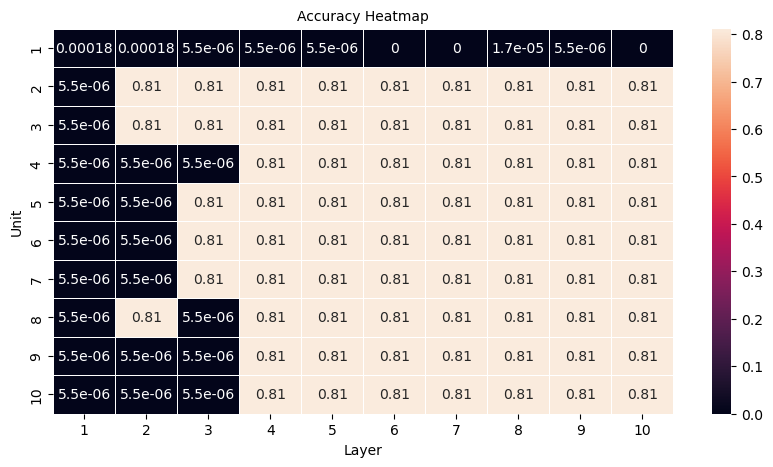

In [219]:
xlabels = range(1, max_range_unit)
ylabels = range(1, max_range_layer)
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(acc_arr, linewidth=0.5, xticklabels=xlabels, yticklabels=ylabels, annot=True)
ax.set_title('Accuracy Heatmap', fontsize=10)
ax.set_xlabel('Unit', fontsize=10)
ax.set_ylabel('Layer', fontsize=10)
plt.show()

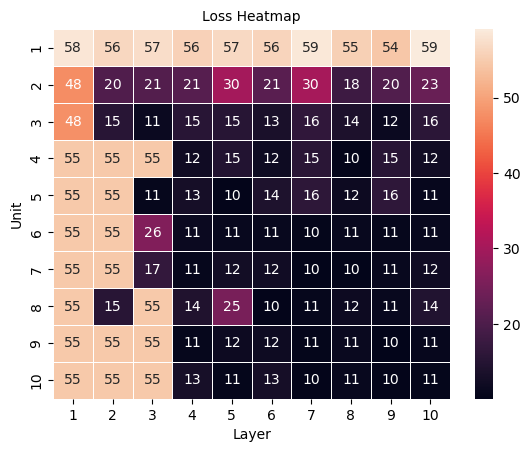

In [221]:
#fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap(loss_arr, linewidth=0.5, xticklabels=xlabels, yticklabels=ylabels, annot=True)
ax.set_title('Loss Heatmap', fontsize=10)
ax.set_xlabel('Unit', fontsize=10)
ax.set_ylabel('Layer', fontsize=10)
plt.show()

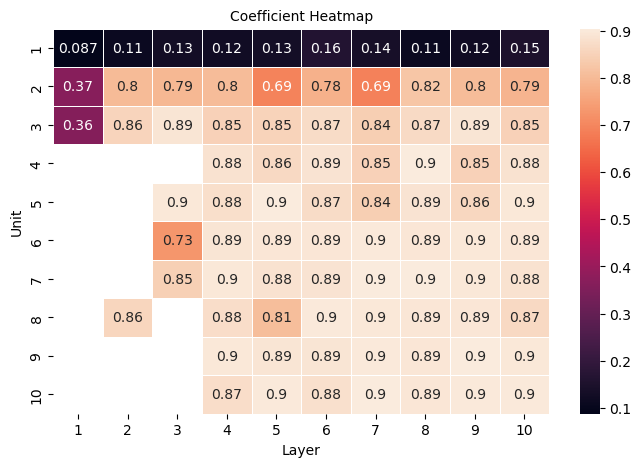

In [224]:
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(coef_arr, linewidth=0.5, xticklabels=xlabels, yticklabels=ylabels, annot=True)
ax.set_title('Coefficient Heatmap', fontsize=10)
ax.set_xlabel('Unit', fontsize=10)
ax.set_ylabel('Layer', fontsize=10)
plt.show()

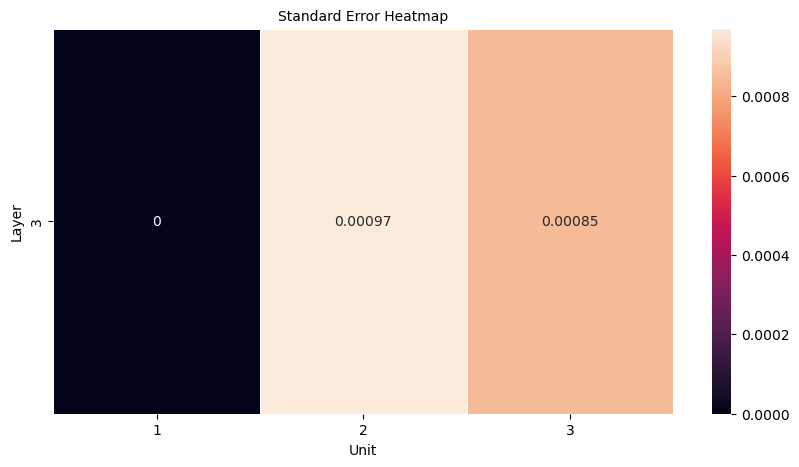

In [286]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(err_arr, linewidth=0.5, xticklabels=xlabels, yticklabels=ylabels, annot=True)
ax.set_title('Standard Error Heatmap', fontsize=10)
ax.set_xlabel('Unit', fontsize=10)
ax.set_ylabel('Layer', fontsize=10)
plt.show()

### Different unit size

In [273]:
def create_different_unit_nn(layer_size, unit_sizes):
    model = keras.Sequential()
    for i in range(1, layer_size):
        if i == 1:
            model.add(Dense(unit_sizes[0], activation='relu', input_shape=(len(X_train[0]),)))
        else:
            model.add(Dense(unit_sizes[i-1], activation='relu'))
    
    model.add(Dense(1, activation="linear"))
    model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=100, validation_data=[X_test, y_test], callbacks=myCallbacks)
    
    y_predict = model.predict(X_test)
    evaluate = model.evaluate(X_test, y_test)
    corr = np.corrcoef(y_predict.flatten(), y_test)
    m, b, r, p, st_er = stats.linregress(y_test.flatten(), y_predict.flatten()) 
    
    loss = evaluate[0]
    acc = evaluate[1]
    coef = corr[0][1]
    
    return acc, loss, coef, st_er

In [288]:
max_range_layer = 11
max_range_unit = 11
acc_arr2 = []
loss_arr2 = []
coef_arr2 = []
err_arr2 = []
size_arr2 = []
for i in range(3, max_range_layer):
    acc_unit = []
    loss_unit = []
    coef_unit = []
    err_unit = []
    size_unit = []
    for j in range(1, max_range_unit):
        idx = 0
        sub = j / i
        units = []
        for l in range(j, i):
            units.append(j)

        for k in range(j, 0, -1):
            if k == j: 
                unit = k
            elif idx == i:
                break
            else:
                unit = int(unit - sub)

            if unit < 1:
                unit = 1
            units.append(unit)
            idx = idx+1

        print("##### Layer:"+str(i)+" Unit:"+str(j)+" #####")
        acc, loss, coef, err = create_different_unit_nn(i, units)
        acc_unit.append(acc)
        loss_unit.append(loss)
        coef_unit.append(coef)
        err_unit.append(err)
        size_unit(units)
    
    acc_arr2.append(acc_unit)
    loss_arr2.append(loss_unit)
    coef_arr2.append(coef_unit)
    err_arr2.append(err_unit)
    size_arr2.append(size_unit)

##### Layer:3 Unit:1 #####
Epoch 1/100
28160/28160 [==============================] - 30s 1ms/step - loss: 82.3526 - accuracy: 0.0904 - val_loss: 47.7263 - val_accuracy: 5.5487e-06
Epoch 2/100
28160/28160 [==============================] - 29s 1ms/step - loss: 40.7908 - accuracy: 5.5487e-06 - val_loss: 47.1735 - val_accuracy: 5.5487e-06
Epoch 3/100
28160/28160 [==============================] - 33s 1ms/step - loss: 40.8579 - accuracy: 5.5487e-06 - val_loss: 47.2789 - val_accuracy: 5.5487e-06
Epoch 4/100
28160/28160 [==============================] - 30s 1ms/step - loss: 40.7323 - accuracy: 5.5487e-06 - val_loss: 47.2703 - val_accuracy: 5.5487e-06
Epoch 5/100
28160/28160 [==============================] - 32s 1ms/step - loss: 40.8503 - accuracy: 5.5487e-06 - val_loss: 47.2838 - val_accuracy: 5.5487e-06
Epoch 6/100
28160/28160 [==============================] - 31s 1ms/step - loss: 40.8853 - accuracy: 5.5487e-06 - val_loss: 47.5960 - val_accuracy: 5.5487e-06
Epoch 7/100
28160/28160 [====

28160/28160 [==============================] - 30s 1ms/step - loss: 18.0804 - accuracy: 0.4067 - val_loss: 18.7812 - val_accuracy: 0.8114
Epoch 7/100
28160/28160 [==============================] - 26s 928us/step - loss: 18.7898 - accuracy: 0.6534 - val_loss: 14.9118 - val_accuracy: 0.8114
Epoch 8/100
28160/28160 [==============================] - 1825s 65ms/step - loss: 15.8776 - accuracy: 0.6411 - val_loss: 17.0777 - val_accuracy: 0.8114
Epoch 9/100
28160/28160 [==============================] - 26s 939us/step - loss: 14.0130 - accuracy: 0.8114 - val_loss: 13.3281 - val_accuracy: 0.8114
Epoch 10/100
28160/28160 [==============================] - 924s 33ms/step - loss: 14.5508 - accuracy: 0.7401 - val_loss: 14.4592 - val_accuracy: 0.8114
Epoch 11/100
28160/28160 [==============================] - 26s 910us/step - loss: 13.8873 - accuracy: 0.8114 - val_loss: 13.6286 - val_accuracy: 0.8114
Epoch 12/100
28160/28160 [==============================] - 27s 942us/step - loss: 13.4420 - accura

28160/28160 [==============================] - 28s 977us/step - loss: 12.0501 - accuracy: 0.8114 - val_loss: 11.8449 - val_accuracy: 0.8114
Epoch 9/100
28160/28160 [==============================] - 28s 1ms/step - loss: 12.1363 - accuracy: 0.8114 - val_loss: 12.7538 - val_accuracy: 0.8112
Epoch 10/100
28160/28160 [==============================] - 28s 979us/step - loss: 11.9761 - accuracy: 0.8114 - val_loss: 11.7755 - val_accuracy: 0.8114
Epoch 11/100
28160/28160 [==============================] - 27s 963us/step - loss: 11.8840 - accuracy: 0.8114 - val_loss: 11.8231 - val_accuracy: 0.8112
Epoch 12/100
28160/28160 [==============================] - 28s 1ms/step - loss: 11.9246 - accuracy: 0.8114 - val_loss: 12.2749 - val_accuracy: 0.8114
Epoch 13/100
5632/5632 [==============================] - 4s 759us/step - loss: 11.8164 - accuracy: 0.8114
##### Layer:4 Unit:5 #####
Epoch 1/100
28160/28160 [==============================] - 27s 954us/step - loss: 10275.0479 - accuracy: 0.2450 - val_l

28160/28160 [==============================] - 1126s 40ms/step - loss: 15.5145 - accuracy: 0.8113 - val_loss: 15.4497 - val_accuracy: 0.8112
Epoch 3/100
28160/28160 [==============================] - 27s 949us/step - loss: 13.7325 - accuracy: 0.8113 - val_loss: 14.2192 - val_accuracy: 0.8112
Epoch 4/100
28160/28160 [==============================] - 27s 967us/step - loss: 12.4976 - accuracy: 0.8112 - val_loss: 13.1986 - val_accuracy: 0.8112
Epoch 5/100
28160/28160 [==============================] - 555s 20ms/step - loss: 12.6067 - accuracy: 0.8112 - val_loss: 12.4234 - val_accuracy: 0.8112
Epoch 6/100
28160/28160 [==============================] - 32s 1ms/step - loss: 12.1778 - accuracy: 0.8110 - val_loss: 12.0861 - val_accuracy: 0.8112
Epoch 7/100
28160/28160 [==============================] - 29s 1ms/step - loss: 12.0679 - accuracy: 0.8112 - val_loss: 14.7665 - val_accuracy: 0.8112
Epoch 8/100
28160/28160 [==============================] - 28s 1ms/step - loss: 11.7176 - accuracy: 0.8

28160/28160 [==============================] - 29s 1ms/step - loss: 12.3602 - accuracy: 0.8113 - val_loss: 13.1564 - val_accuracy: 0.8114
Epoch 8/100
28160/28160 [==============================] - 29s 1ms/step - loss: 12.2229 - accuracy: 0.8111 - val_loss: 11.2359 - val_accuracy: 0.8112
Epoch 9/100
28160/28160 [==============================] - 29s 1ms/step - loss: 11.8366 - accuracy: 0.8113 - val_loss: 11.4466 - val_accuracy: 0.8112
Epoch 10/100
28160/28160 [==============================] - 29s 1ms/step - loss: 11.6033 - accuracy: 0.8113 - val_loss: 12.2527 - val_accuracy: 0.8114
Epoch 11/100
28160/28160 [==============================] - 29s 1ms/step - loss: 11.4801 - accuracy: 0.8112 - val_loss: 10.9577 - val_accuracy: 0.8114
Epoch 12/100
28160/28160 [==============================] - 29s 1ms/step - loss: 11.5032 - accuracy: 0.8113 - val_loss: 11.8089 - val_accuracy: 0.8114
Epoch 13/100
28160/28160 [==============================] - 29s 1ms/step - loss: 11.4582 - accuracy: 0.8113 -

Epoch 10/100
28160/28160 [==============================] - 38s 1ms/step - loss: 11.7218 - accuracy: 0.8114 - val_loss: 12.8822 - val_accuracy: 0.8112
Epoch 11/100
28160/28160 [==============================] - 39s 1ms/step - loss: 12.0761 - accuracy: 0.8113 - val_loss: 13.5324 - val_accuracy: 0.8112
Epoch 12/100
5632/5632 [==============================] - 7s 1ms/step - loss: 11.4044 - accuracy: 0.8112
##### Layer:6 Unit:6 #####
Epoch 1/100
28160/28160 [==============================] - 42s 1ms/step - loss: 26.9500 - accuracy: 0.5179 - val_loss: 26.1151 - val_accuracy: 0.8112
Epoch 2/100
28160/28160 [==============================] - 42s 1ms/step - loss: 16.6773 - accuracy: 0.8112 - val_loss: 13.7098 - val_accuracy: 0.8112
Epoch 3/100
28160/28160 [==============================] - 39s 1ms/step - loss: 14.7945 - accuracy: 0.8112 - val_loss: 14.7303 - val_accuracy: 0.8112
Epoch 4/100
28160/28160 [==============================] - 36s 1ms/step - loss: 13.7194 - accuracy: 0.8087 - val_los

Epoch 5/100
28160/28160 [==============================] - 51s 2ms/step - loss: 54.6993 - accuracy: 5.5487e-06 - val_loss: 54.7007 - val_accuracy: 5.5487e-06
Epoch 6/100
28160/28160 [==============================] - 52s 2ms/step - loss: 54.6988 - accuracy: 5.5487e-06 - val_loss: 54.7001 - val_accuracy: 5.5487e-06
Epoch 7/100
28160/28160 [==============================] - 52s 2ms/step - loss: 54.6991 - accuracy: 5.5487e-06 - val_loss: 54.6983 - val_accuracy: 5.5487e-06
Epoch 8/100
28160/28160 [==============================] - 53s 2ms/step - loss: 54.6998 - accuracy: 5.5487e-06 - val_loss: 54.6965 - val_accuracy: 5.5487e-06
Epoch 9/100
28160/28160 [==============================] - 53s 2ms/step - loss: 54.6993 - accuracy: 5.5487e-06 - val_loss: 54.6963 - val_accuracy: 5.5487e-06
Epoch 10/100
28160/28160 [==============================] - 52s 2ms/step - loss: 54.6994 - accuracy: 5.5487e-06 - val_loss: 54.6992 - val_accuracy: 5.5487e-06
Epoch 11/100
5632/5632 [===========================

28160/28160 [==============================] - 30s 1ms/step - loss: 54.6995 - accuracy: 5.5487e-06 - val_loss: 54.6973 - val_accuracy: 5.5487e-06
Epoch 6/100
28160/28160 [==============================] - 30s 1ms/step - loss: 54.6993 - accuracy: 5.5487e-06 - val_loss: 54.7011 - val_accuracy: 5.5487e-06
Epoch 7/100
28160/28160 [==============================] - 30s 1ms/step - loss: 54.6994 - accuracy: 5.5487e-06 - val_loss: 54.7001 - val_accuracy: 5.5487e-06
Epoch 8/100
28160/28160 [==============================] - 30s 1ms/step - loss: 54.6997 - accuracy: 5.5487e-06 - val_loss: 54.6965 - val_accuracy: 5.5487e-06
Epoch 9/100
28160/28160 [==============================] - 29s 1ms/step - loss: 54.6996 - accuracy: 5.5487e-06 - val_loss: 54.7010 - val_accuracy: 5.5487e-06
Epoch 10/100
28160/28160 [==============================] - 30s 1ms/step - loss: 54.6994 - accuracy: 5.5487e-06 - val_loss: 54.6989 - val_accuracy: 5.5487e-06
Epoch 11/100
5632/5632 [==============================] - 4s 79

28160/28160 [==============================] - 32s 1ms/step - loss: 14.5835 - accuracy: 0.8107 - val_loss: 13.9292 - val_accuracy: 0.8114
Epoch 12/100
28160/28160 [==============================] - 31s 1ms/step - loss: 14.4296 - accuracy: 0.8107 - val_loss: 15.4259 - val_accuracy: 0.8114
Epoch 13/100
28160/28160 [==============================] - 31s 1ms/step - loss: 13.6122 - accuracy: 0.8112 - val_loss: 20.6199 - val_accuracy: 0.8114
Epoch 14/100
28160/28160 [==============================] - 30s 1ms/step - loss: 15.4682 - accuracy: 0.8109 - val_loss: 19.8791 - val_accuracy: 0.8112
Epoch 15/100
28160/28160 [==============================] - 31s 1ms/step - loss: 15.0370 - accuracy: 0.8113 - val_loss: 38.0089 - val_accuracy: 0.8114
Epoch 16/100
28160/28160 [==============================] - 31s 1ms/step - loss: 14.7497 - accuracy: 0.8113 - val_loss: 13.1482 - val_accuracy: 0.8112
Epoch 17/100
28160/28160 [==============================] - 30s 1ms/step - loss: 13.1384 - accuracy: 0.8112

28160/28160 [==============================] - 31s 1ms/step - loss: 54.6996 - accuracy: 5.5487e-06 - val_loss: 54.6969 - val_accuracy: 5.5487e-06
Epoch 9/100
28160/28160 [==============================] - 32s 1ms/step - loss: 54.6993 - accuracy: 5.5487e-06 - val_loss: 54.6976 - val_accuracy: 5.5487e-06
Epoch 10/100
28160/28160 [==============================] - 32s 1ms/step - loss: 54.6994 - accuracy: 5.5487e-06 - val_loss: 54.6991 - val_accuracy: 5.5487e-06
Epoch 11/100
5632/5632 [==============================] - 4s 787us/step - loss: 54.6964 - accuracy: 5.5487e-06
##### Layer:9 Unit:4 #####
Epoch 1/100
28160/28160 [==============================] - 31s 1ms/step - loss: 24.3821 - accuracy: 0.5252 - val_loss: 16.5912 - val_accuracy: 0.8112
Epoch 2/100
28160/28160 [==============================] - 31s 1ms/step - loss: 13.0940 - accuracy: 0.8113 - val_loss: 12.3550 - val_accuracy: 0.8112
Epoch 3/100
28160/28160 [==============================] - 31s 1ms/step - loss: 12.7025 - accuracy:

28160/28160 [==============================] - 31s 1ms/step - loss: 54.6998 - accuracy: 5.5487e-06 - val_loss: 54.6976 - val_accuracy: 5.5487e-06
Epoch 9/100
28160/28160 [==============================] - 31s 1ms/step - loss: 54.6998 - accuracy: 5.5487e-06 - val_loss: 54.6991 - val_accuracy: 5.5487e-06
Epoch 10/100
28160/28160 [==============================] - 31s 1ms/step - loss: 54.6992 - accuracy: 5.5487e-06 - val_loss: 54.6997 - val_accuracy: 5.5487e-06
Epoch 11/100
5632/5632 [==============================] - 5s 803us/step - loss: 54.6966 - accuracy: 5.5487e-06
##### Layer:9 Unit:8 #####
Epoch 1/100
28160/28160 [==============================] - 32s 1ms/step - loss: 22.2618 - accuracy: 0.6168 - val_loss: 11.8126 - val_accuracy: 0.8114
Epoch 2/100
28160/28160 [==============================] - 32s 1ms/step - loss: 13.6988 - accuracy: 0.8047 - val_loss: 20.8246 - val_accuracy: 0.8114
Epoch 3/100
28160/28160 [==============================] - 31s 1ms/step - loss: 12.1737 - accuracy:

5632/5632 [==============================] - 5s 837us/step - loss: 54.6978 - accuracy: 5.5487e-06
##### Layer:10 Unit:6 #####
Epoch 1/100
28160/28160 [==============================] - 33s 1ms/step - loss: 25.9155 - accuracy: 0.7380 - val_loss: 18.8334 - val_accuracy: 0.8112
Epoch 2/100
28160/28160 [==============================] - 32s 1ms/step - loss: 14.1379 - accuracy: 0.8113 - val_loss: 11.1160 - val_accuracy: 0.8112
Epoch 3/100
28160/28160 [==============================] - 32s 1ms/step - loss: 12.7977 - accuracy: 0.8112 - val_loss: 12.0923 - val_accuracy: 0.8112
Epoch 4/100
28160/28160 [==============================] - 33s 1ms/step - loss: 13.0226 - accuracy: 0.8112 - val_loss: 11.1222 - val_accuracy: 0.8112
Epoch 5/100
28160/28160 [==============================] - 32s 1ms/step - loss: 12.7506 - accuracy: 0.8112 - val_loss: 15.7952 - val_accuracy: 0.8112
Epoch 6/100
28160/28160 [==============================] - 32s 1ms/step - loss: 12.2268 - accuracy: 0.8112 - val_loss: 13.87

28160/28160 [==============================] - 33s 1ms/step - loss: 14.5054 - accuracy: 0.7804 - val_loss: 14.7246 - val_accuracy: 5.5487e-06
Epoch 3/100
28160/28160 [==============================] - 33s 1ms/step - loss: 12.2041 - accuracy: 0.7836 - val_loss: 11.3268 - val_accuracy: 0.8112
Epoch 4/100
28160/28160 [==============================] - 33s 1ms/step - loss: 12.4589 - accuracy: 0.8016 - val_loss: 11.1238 - val_accuracy: 0.8112
Epoch 5/100
28160/28160 [==============================] - 33s 1ms/step - loss: 12.4015 - accuracy: 0.7966 - val_loss: 10.7455 - val_accuracy: 0.8112
Epoch 6/100
28160/28160 [==============================] - 33s 1ms/step - loss: 14.1058 - accuracy: 0.7906 - val_loss: 11.5228 - val_accuracy: 0.8112
Epoch 7/100
28160/28160 [==============================] - 33s 1ms/step - loss: 14.0696 - accuracy: 0.7941 - val_loss: 13.5147 - val_accuracy: 0.8112
Epoch 8/100
28160/28160 [==============================] - 33s 1ms/step - loss: 11.8816 - accuracy: 0.7976 -

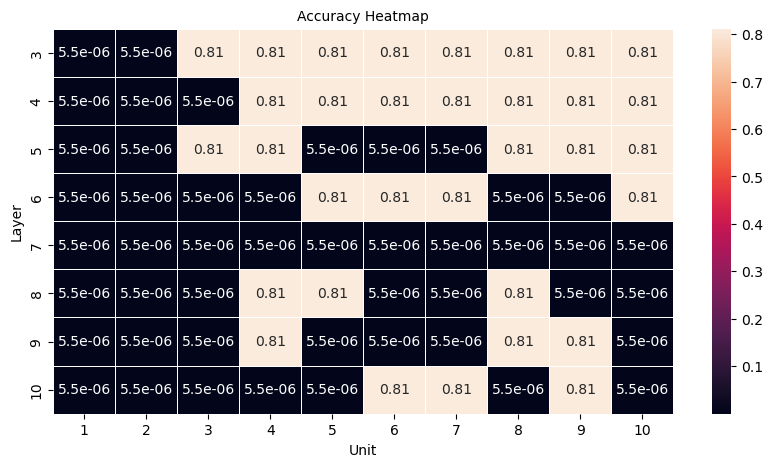

In [289]:
xlabels = range(1, max_range_unit)
ylabels = range(3, max_range_layer)
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(acc_arr2, linewidth=0.5, xticklabels=xlabels, yticklabels=ylabels, annot=True)
ax.set_title('Accuracy Heatmap', fontsize=10)
ax.set_xlabel('Unit', fontsize=10)
ax.set_ylabel('Layer', fontsize=10)
plt.show()

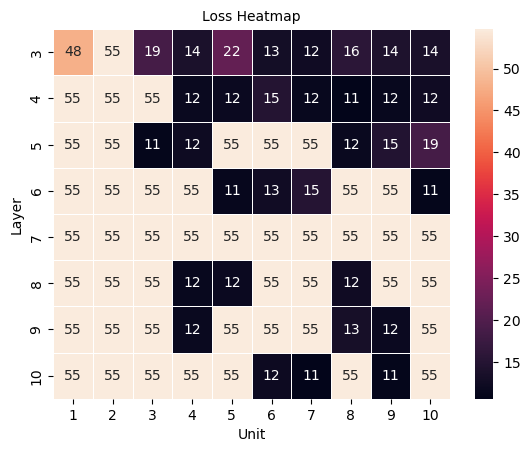

In [290]:
ax = sns.heatmap(loss_arr2, linewidth=0.5, xticklabels=xlabels, yticklabels=ylabels, annot=True)
ax.set_title('Loss Heatmap', fontsize=10)
ax.set_xlabel('Unit', fontsize=10)
ax.set_ylabel('Layer', fontsize=10)
plt.show()

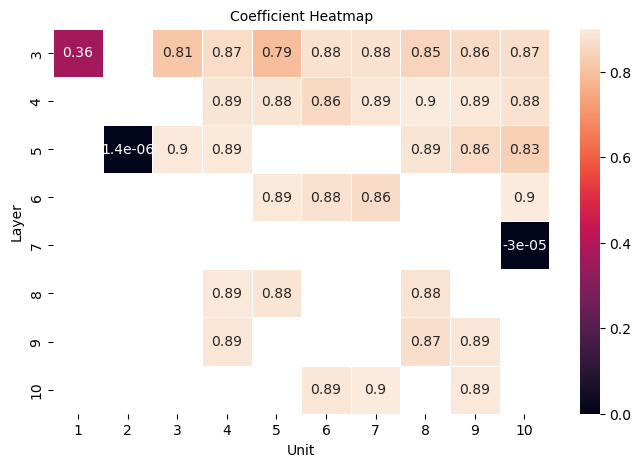

In [291]:
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(coef_arr2, linewidth=0.5, xticklabels=xlabels, yticklabels=ylabels, annot=True)
ax.set_title('Coefficient Heatmap', fontsize=10)
ax.set_xlabel('Unit', fontsize=10)
ax.set_ylabel('Layer', fontsize=10)
plt.show()

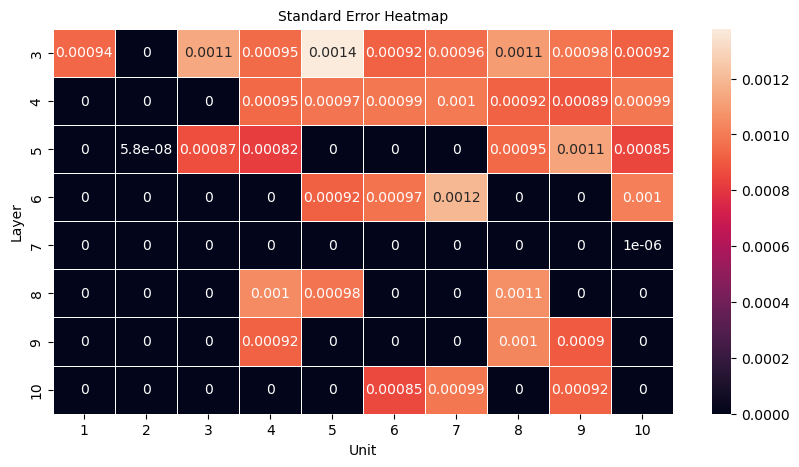

In [292]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(err_arr2, linewidth=0.5, xticklabels=xlabels, yticklabels=ylabels, annot=True)
ax.set_title('Standard Error Heatmap', fontsize=10)
ax.set_xlabel('Unit', fontsize=10)
ax.set_ylabel('Layer', fontsize=10)
plt.show()

In [383]:
max_range_layer = 11
max_range_unit = 11
size_arr2 = []
for i in range(3, max_range_layer):
    size_unit = []
    for j in range(1, max_range_unit):
        idx = 0
        sub = j / i
        units = []
        for l in range(j, i):
            units.append(j)

        for k in range(j, 0, -1):
            if k == j: 
                unit = k
            elif idx == i:
                break
            else:
                unit = int(unit - sub)

            if unit < 1:
                unit = 1
            units.append(unit)
            idx = idx+1

        print("##### Layer:"+str(i)+" Unit:"+str(j)+" #####")
        print(units)
        size_unit.append(units)
    
    size_arr2.append(size_unit)

##### Layer:3 Unit:1 #####
[1, 1, 1]
##### Layer:3 Unit:2 #####
[2, 2, 1]
##### Layer:3 Unit:3 #####
[3, 2, 1]
##### Layer:3 Unit:4 #####
[4, 2, 1]
##### Layer:3 Unit:5 #####
[5, 3, 1]
##### Layer:3 Unit:6 #####
[6, 4, 2]
##### Layer:3 Unit:7 #####
[7, 4, 1]
##### Layer:3 Unit:8 #####
[8, 5, 2]
##### Layer:3 Unit:9 #####
[9, 6, 3]
##### Layer:3 Unit:10 #####
[10, 6, 2]
##### Layer:4 Unit:1 #####
[1, 1, 1, 1]
##### Layer:4 Unit:2 #####
[2, 2, 2, 1]
##### Layer:4 Unit:3 #####
[3, 3, 2, 1]
##### Layer:4 Unit:4 #####
[4, 3, 2, 1]
##### Layer:4 Unit:5 #####
[5, 3, 1, 1]
##### Layer:4 Unit:6 #####
[6, 4, 2, 1]
##### Layer:4 Unit:7 #####
[7, 5, 3, 1]
##### Layer:4 Unit:8 #####
[8, 6, 4, 2]
##### Layer:4 Unit:9 #####
[9, 6, 3, 1]
##### Layer:4 Unit:10 #####
[10, 7, 4, 1]
##### Layer:5 Unit:1 #####
[1, 1, 1, 1, 1]
##### Layer:5 Unit:2 #####
[2, 2, 2, 2, 1]
##### Layer:5 Unit:3 #####
[3, 3, 3, 2, 1]
##### Layer:5 Unit:4 #####
[4, 4, 3, 2, 1]
##### Layer:5 Unit:5 #####
[5, 4, 3, 2, 1]
##### Layer

In [384]:
size_arr2

[[[1, 1, 1],
  [2, 2, 1],
  [3, 2, 1],
  [4, 2, 1],
  [5, 3, 1],
  [6, 4, 2],
  [7, 4, 1],
  [8, 5, 2],
  [9, 6, 3],
  [10, 6, 2]],
 [[1, 1, 1, 1],
  [2, 2, 2, 1],
  [3, 3, 2, 1],
  [4, 3, 2, 1],
  [5, 3, 1, 1],
  [6, 4, 2, 1],
  [7, 5, 3, 1],
  [8, 6, 4, 2],
  [9, 6, 3, 1],
  [10, 7, 4, 1]],
 [[1, 1, 1, 1, 1],
  [2, 2, 2, 2, 1],
  [3, 3, 3, 2, 1],
  [4, 4, 3, 2, 1],
  [5, 4, 3, 2, 1],
  [6, 4, 2, 1, 1],
  [7, 5, 3, 1, 1],
  [8, 6, 4, 2, 1],
  [9, 7, 5, 3, 1],
  [10, 8, 6, 4, 2]],
 [[1, 1, 1, 1, 1, 1],
  [2, 2, 2, 2, 2, 1],
  [3, 3, 3, 3, 2, 1],
  [4, 4, 4, 3, 2, 1],
  [5, 5, 4, 3, 2, 1],
  [6, 5, 4, 3, 2, 1],
  [7, 5, 3, 1, 1, 1],
  [8, 6, 4, 2, 1, 1],
  [9, 7, 5, 3, 1, 1],
  [10, 8, 6, 4, 2, 1]],
 [[1, 1, 1, 1, 1, 1, 1],
  [2, 2, 2, 2, 2, 2, 1],
  [3, 3, 3, 3, 3, 2, 1],
  [4, 4, 4, 4, 3, 2, 1],
  [5, 5, 5, 4, 3, 2, 1],
  [6, 6, 5, 4, 3, 2, 1],
  [7, 6, 5, 4, 3, 2, 1],
  [8, 6, 4, 2, 1, 1, 1],
  [9, 7, 5, 3, 1, 1, 1],
  [10, 8, 6, 4, 2, 1, 1]],
 [[1, 1, 1, 1, 1, 1, 1, 1],
  [2, 2, 2, 

## Find out Hyper paramater 

In [371]:
myCallbacks = [tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=10, mode='max')]

In [356]:
# Use best layer and unit
shape = (len(X_train[0]),)
def create_model(optimizer="adam"):
    model = keras.Sequential()
    model.add(Dense(7, activation='relu', input_shape=shape)) 
    model.add(Dense(7, activation='relu'))
    model.add(Dense(7, activation='relu'))
    model.add(Dense(7, activation='relu'))
    model.add(Dense(7, activation='relu'))
    model.add(Dense(7, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=optimizer, loss='mse', metrics=["accuracy"])
    return model

### Epoch

In [332]:
estimator = KerasRegressor(model=create_model, verbose=1)

In [389]:

# define the grid search parameters
param_grid = {
    'epochs': [200, 300, 400, 600, 1000]
}

In [390]:
grid5 = GridSearchCV(estimator=estimator,  
                    n_jobs=-1, 
                    verbose=1,
                    return_train_score=True,
                    cv=2,
                    param_grid=param_grid)

In [391]:
grid5_result = grid5.fit(X_train, y_train, callbacks=myCallbacks)

Fitting 2 folds for each of 5 candidates, totalling 10 fits


2022-10-31 17:33:32.228047: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-31 17:33:32.230044: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-31 17:33:32.231691: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable th

Epoch 1/300
Epoch 1/200
Epoch 1/300
Epoch 1/200
14080/14080 [==============================] - 23s 2ms/step - loss: 40.4607 - accuracy: 0.1540
Epoch 2/300
14080/14080 [==============================] - 24s 2ms/step - loss: 55.4574 - accuracy: 0.0373
Epoch 2/200
14080/14080 [==============================] - 24s 2ms/step - loss: 24.8319 - accuracy: 0.8094
Epoch 2/300
14080/14080 [==============================] - 24s 2ms/step - loss: 33.1252 - accuracy: 0.5358
Epoch 2/200
14080/14080 [==============================] - 21s 1ms/step - loss: 19.4535 - accuracy: 0.8116
Epoch 3/300
14080/14080 [==============================] - 21s 2ms/step - loss: 54.9840 - accuracy: 6.6584e-06
Epoch 3/200
14080/14080 [==============================] - 21s 1ms/step - loss: 19.3272 - accuracy: 0.8100
Epoch 3/200
14080/14080 [==============================] - 21s 2ms/step - loss: 16.0737 - accuracy: 0.8084
Epoch 3/300
14080/14080 [==============================] - 22s 2ms/step - loss: 15.7847 - accuracy: 0.81

KeyboardInterrupt: 

In [392]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.808987 using {'epochs': 250}
0.799208 (0.010009) with: {'epochs': 100}
0.808987 (0.004427) with: {'epochs': 250}
0.407522 (0.407522) with: {'epochs': 500}


In [393]:
grid_result.cv_results_

{'mean_fit_time': array([2174.08465183, 5569.95037341, 8818.5994935 ]),
 'std_fit_time': array([8.57827103, 9.51987457, 0.95320845]),
 'mean_score_time': array([20.21982062, 30.93196142, 13.4324255 ]),
 'std_score_time': array([ 0.47323763, 10.32487452,  0.0261755 ]),
 'param_epochs': masked_array(data=[100, 250, 500],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'epochs': 100}, {'epochs': 250}, {'epochs': 500}],
 'split0_test_score': array([ 7.89199002e-01,  8.13413814e-01, -1.11317324e-08]),
 'split1_test_score': array([0.80921781, 0.80455986, 0.8150433 ]),
 'mean_test_score': array([0.7992084 , 0.80898684, 0.40752165]),
 'std_test_score': array([0.0100094 , 0.00442698, 0.40752166]),
 'rank_test_score': array([2, 1, 3], dtype=int32),
 'split0_train_score': array([ 7.88911302e-01,  8.06682820e-01, -6.81971615e-07]),
 'split1_train_score': array([0.80952447, 0.80505773, 0.82118217]),
 'mean_train_score': array([0.79921789, 0

In [ ]:
# summarize results
print("Best: %f using %s" % (grid5_result.best_score_, grid5_result.best_params_))
means = grid5_result.cv_results_['mean_test_score']
stds = grid5_result.cv_results_['std_test_score']
params = grid5_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
grid5_result.cv_results_

### Batch size

In [370]:
# define the grid search parameters
param_grid = {
    'batch_size':[32, 64, 128, 256, 512, 1024, 2048]
}

In [372]:
grid2 = GridSearchCV(estimator=estimator,  
                    n_jobs=-1, 
                    verbose=1,
                    return_train_score=True,
                    cv=2,
                    param_grid=param_grid)
grid2_result = grid2.fit(X_train, y_train, epochs=100, callbacks=myCallbacks)

Fitting 2 folds for each of 7 candidates, totalling 14 fits


2022-10-31 09:41:20.501142: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-31 09:41:20.501142: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-31 09:41:20.502780: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable th

Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
7040/7040 [==============================] - 12s 2ms/step - loss: 34.3111 - accuracy: 0.8116
Epoch 2/100
7040/7040 [==============================] - 10s 1ms/step - loss: 24.2337 - accuracy: 0.8115
Epoch 3/100
14080/14080 [==============================] - 22s 2ms/step - loss: 39.5033 - accuracy: 0.8110
Epoch 2/100
14080/14080 [==============================] - 22s 2ms/step - loss: 28.2298 - accuracy: 0.5409
Epoch 2/100
7040/7040 [==============================] - 10s 1ms/step - loss: 19.0367 - accuracy: 0.8111
Epoch 3/100
7040/7040 [==============================] - 11s 2ms/step - loss: 18.7222 - accuracy: 0.8110
Epoch 4/100
7040/7040 [==============================] - 11s 2ms/step - loss: 15.3953 - accuracy: 0.8111
Epoch 4/100
14080/14080 [==============================] - 22s 2ms/step - loss: 18.2047 - accuracy: 0.8110
Epoch 3/100
7040/7040 [==============================] - 11s 2ms/step - loss: 14.1429 - accuracy: 0.8115
Epoch 5/100
1

14080/14080 [==============================] - 23s 2ms/step - loss: 11.3167 - accuracy: 0.8107
Epoch 25/100
7040/7040 [==============================] - 11s 2ms/step - loss: 12.1349 - accuracy: 0.8110
Epoch 50/100
7040/7040 [==============================] - 11s 2ms/step - loss: 11.2033 - accuracy: 0.8052
Epoch 50/100
7040/7040 [==============================] - 10s 1ms/step - loss: 10.6834 - accuracy: 0.8094
Epoch 51/100
7040/7040 [==============================] - 10s 1ms/step - loss: 11.2180 - accuracy: 0.8046
Epoch 51/100
14080/14080 [==============================] - 21s 1ms/step - loss: 10.8040 - accuracy: 0.8108
Epoch 26/100
14080/14080 [==============================] - 21s 1ms/step - loss: 11.2189 - accuracy: 0.8087
Epoch 26/100
7040/7040 [==============================] - 11s 2ms/step - loss: 10.8873 - accuracy: 0.8110
Epoch 52/100
7040/7040 [==============================] - 11s 2ms/step - loss: 10.9835 - accuracy: 0.8050
Epoch 52/100
7040/7040 [=============================

14080/14080 [==============================] - 23s 2ms/step - loss: 10.6845 - accuracy: 0.8110
Epoch 37/100
7040/7040 [==============================] - 11s 2ms/step - loss: 10.3667 - accuracy: 0.8110
Epoch 74/100
7040/7040 [==============================] - 11s 2ms/step - loss: 10.7055 - accuracy: 0.8039................] - ETA: 13s - loss: 10.7443 - accuracy: 0.811
Epoch 74/100
7040/7040 [==============================] - 12s 2ms/step - loss: 10.4555 - accuracy: 0.8110
Epoch 75/100
7040/7040 [==============================] - 12s 2ms/step - loss: 10.8201 - accuracy: 0.8019
Epoch 75/100
14080/14080 [==============================] - 23s 2ms/step - loss: 10.5829 - accuracy: 0.8110
Epoch 38/100
14080/14080 [==============================] - 23s 2ms/step - loss: 11.1509 - accuracy: 0.8115
Epoch 38/100
7040/7040 [==============================] - 12s 2ms/step - loss: 10.4963 - accuracy: 0.8110
Epoch 76/100
7040/7040 [==============================] - 12s 2ms/step - loss: 10.7672 - accuracy

3520/3520 [==============================] - 5s 1ms/step - loss: 11.5394 - accuracy: 0.8110
Epoch 21/100
3520/3520 [==============================] - 5s 1ms/step - loss: 11.5574 - accuracy: 0.8117
Epoch 23/100
3520/3520 [==============================] - 5s 2ms/step - loss: 11.9378 - accuracy: 0.8116
Epoch 24/100
3520/3520 [==============================] - 5s 1ms/step - loss: 11.0925 - accuracy: 0.8096
Epoch 23/100
14080/14080 [==============================] - 20s 1ms/step - loss: 10.4806 - accuracy: 0.8110
Epoch 58/100
14080/14080 [==============================] - 20s 1ms/step - loss: 10.9678 - accuracy: 0.8115
Epoch 58/100
3520/3520 [==============================] - 5s 1ms/step - loss: 11.6189 - accuracy: 0.8115
Epoch 25/100
3520/3520 [==============================] - 5s 1ms/step - loss: 11.0982 - accuracy: 0.8064
Epoch 24/100
3520/3520 [==============================] - 5s 1ms/step - loss: 11.2968 - accuracy: 0.8110
Epoch 25/100
3520/3520 [==============================] - 5s 1

3520/3520 [==============================] - 5s 2ms/step - loss: 10.6205 - accuracy: 0.8115
Epoch 52/100
14080/14080 [==============================] - 20s 1ms/step - loss: 10.9478 - accuracy: 0.8110
Epoch 65/100
3520/3520 [==============================] - 5s 2ms/step - loss: 10.5805 - accuracy: 0.8110
Epoch 51/100
14080/14080 [==============================] - 20s 1ms/step - loss: 10.8431 - accuracy: 0.8115
Epoch 65/100
3520/3520 [==============================] - 5s 1ms/step - loss: 10.6950 - accuracy: 0.8115
Epoch 53/100
3520/3520 [==============================] - 5s 1ms/step - loss: 10.7163 - accuracy: 0.8110
Epoch 52/100
3520/3520 [==============================] - 5s 1ms/step - loss: 10.6037 - accuracy: 0.8115
Epoch 54/100
3520/3520 [==============================] - 5s 1ms/step - loss: 10.4471 - accuracy: 0.8110
Epoch 53/100
3520/3520 [==============================] - 5s 1ms/step - loss: 11.6538 - accuracy: 0.8115
Epoch 55/100
3520/3520 [==============================] - 5s 1

 5415/14080 [==========>...................] - ETA: 12s - loss: 12.4920 - accuracy: 0.81193520/3520 [==============================] - 5s 2ms/step - loss: 10.9762 - accuracy: 0.8115
Epoch 82/100
3520/3520 [==============================] - 5s 2ms/step - loss: 10.3147 - accuracy: 0.8110
Epoch 81/100
3520/3520 [==============================] - 5s 1ms/step - loss: 10.8535 - accuracy: 0.8108
Epoch 83/100
3520/3520 [==============================] - 5s 1ms/step - loss: 10.4843 - accuracy: 0.8110
Epoch 82/100
14080/14080 [==============================] - 20s 1ms/step - loss: 10.6328 - accuracy: 0.8109
Epoch 73/100
3520/3520 [==============================] - 5s 1ms/step - loss: 10.9718 - accuracy: 0.8115
Epoch 84/100
14080/14080 [==============================] - 20s 1ms/step - loss: 10.6342 - accuracy: 0.8115
Epoch 73/100
3520/3520 [==============================] - 5s 1ms/step - loss: 10.6260 - accuracy: 0.8101................] - ETA: 18s - loss: 15.2070 - a
Epoch 85/100
3520/3520 [=====

1760/1760 [==============================] - 3s 1ms/step - loss: 11.0511 - accuracy: 0.8110
Epoch 27/100
1760/1760 [==============================] - 3s 1ms/step - loss: 10.7808 - accuracy: 0.8116
Epoch 55/100
1760/1760 [==============================] - 3s 1ms/step - loss: 11.1092 - accuracy: 0.8110
Epoch 28/100
14080/14080 [==============================] - 20s 1ms/step - loss: 10.5707 - accuracy: 0.8109
Epoch 85/100
1760/1760 [==============================] - 3s 1ms/step - loss: 10.9057 - accuracy: 0.8117
Epoch 56/100
14080/14080 [==============================] - 20s 1ms/step - loss: 10.7780 - accuracy: 0.8115
Epoch 85/100
1760/1760 [==============================] - 3s 1ms/step - loss: 11.1548 - accuracy: 0.8110
Epoch 30/100
1760/1760 [==============================] - 3s 1ms/step - loss: 10.9625 - accuracy: 0.8117
Epoch 58/100
1760/1760 [==============================] - 3s 2ms/step - loss: 10.9861 - accuracy: 0.8110
Epoch 31/100
1760/1760 [==============================] - 3s 2

1760/1760 [==============================] - 3s 1ms/step - loss: 10.3252 - accuracy: 0.8110
Epoch 88/100
880/880 [==============================] - 1s 2ms/step - loss: 13.6260 - accuracy: 0.7921
Epoch 24/100
1760/1760 [==============================] - 3s 1ms/step - loss: 10.2279 - accuracy: 0.8110
Epoch 89/100
880/880 [==============================] - 1s 1ms/step - loss: 12.4539 - accuracy: 0.8115
Epoch 26/100
880/880 [==============================] - 1s 1ms/step - loss: 11.6163 - accuracy: 0.8115
Epoch 27/100
1760/1760 [==============================] - 3s 1ms/step - loss: 10.2658 - accuracy: 0.8110
Epoch 90/100
880/880 [==============================] - 1s 1ms/step - loss: 12.0972 - accuracy: 0.8115
Epoch 28/100
880/880 [==============================] - 1s 1ms/step - loss: 11.5883 - accuracy: 0.8115
Epoch 29/100
1760/1760 [==============================] - 3s 1ms/step - loss: 10.3349 - accuracy: 0.8110
Epoch 91/100
880/880 [==============================] - 1s 1ms/step - loss: 11

880/880 [==============================] - 1s 2ms/step - loss: 10.5352 - accuracy: 0.8115
Epoch 68/100
880/880 [==============================] - 1s 2ms/step - loss: 10.9984 - accuracy: 0.8110
Epoch 13/100
880/880 [==============================] - 1s 2ms/step - loss: 10.5657 - accuracy: 0.8115
Epoch 69/100
880/880 [==============================] - 1s 2ms/step - loss: 10.8534 - accuracy: 0.8110
Epoch 14/100
880/880 [==============================] - 1s 1ms/step - loss: 10.9774 - accuracy: 0.8110
Epoch 15/100
880/880 [==============================] - 1s 2ms/step - loss: 10.4682 - accuracy: 0.8115
Epoch 70/100
880/880 [==============================] - 1s 2ms/step - loss: 10.8285 - accuracy: 0.8110
Epoch 16/100
880/880 [==============================] - 1s 2ms/step - loss: 10.4784 - accuracy: 0.8115
Epoch 71/100
880/880 [==============================] - 1s 2ms/step - loss: 10.7073 - accuracy: 0.8110
Epoch 18/100
880/880 [==============================] - 1s 2ms/step - loss: 10.5124 - 

880/880 [==============================] - 1s 1ms/step - loss: 10.4496 - accuracy: 0.8110
Epoch 49/100
880/880 [==============================] - 1s 1ms/step - loss: 10.3330 - accuracy: 0.8110
Epoch 50/100
189/880 [=====>........................] - ETA: 0s - loss: 9.6064 - accuracy: 0.8104.809

/Users/chikakoolsen/opt/anaconda3/envs/tf/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


880/880 [==============================] - 1s 1ms/step - loss: 10.3104 - accuracy: 0.8110
Epoch 51/100
880/880 [==============================] - 1s 1ms/step - loss: 10.2441 - accuracy: 0.8110
Epoch 52/100
14080/14080 [==============================] - 20s 1ms/step - loss: 10.6348 - accuracy: 0.8098
Epoch 98/100
880/880 [==============================] - 1s 1ms/step - loss: 10.3724 - accuracy: 0.8110
Epoch 53/100
880/880 [==============================] - 1s 1ms/step - loss: 10.2879 - accuracy: 0.8110
Epoch 54/100
14080/14080 [==============================] - 20s 1ms/step - loss: 10.6495 - accuracy: 0.8115
Epoch 98/100
880/880 [==============================] - 1s 1ms/step - loss: 10.3174 - accuracy: 0.8110
Epoch 55/100
 1292/14080 [=>............................] - ETA: 17s - loss: 13.1106 - accuracy: 0.8115

2022-10-31 10:15:24.387788: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


880/880 [==============================] - 1s 1ms/step - loss: 10.2837 - accuracy: 0.8110
Epoch 56/100
440/440 [==============================] - 1s 2ms/step - loss: 43.1245 - accuracy: 0.7913
Epoch 2/100
880/880 [==============================] - 1s 1ms/step - loss: 10.2401 - accuracy: 0.8110
Epoch 57/100
440/440 [==============================] - 1s 2ms/step - loss: 35.9229 - accuracy: 1.8200e-04
Epoch 3/100
440/440 [==============================] - 1s 2ms/step - loss: 30.4084 - accuracy: 1.5536e-04
Epoch 4/100
880/880 [==============================] - 1s 2ms/step - loss: 10.3811 - accuracy: 0.8110
Epoch 58/100
440/440 [==============================] - 1s 2ms/step - loss: 26.0556 - accuracy: 1.4870e-04
Epoch 5/100
880/880 [==============================] - 1s 1ms/step - loss: 10.3096 - accuracy: 0.8110
Epoch 59/100
440/440 [==============================] - 1s 2ms/step - loss: 22.6456 - accuracy: 0.8116
Epoch 7/100
440/440 [==============================] - 1s 2ms/step - loss: 20.

440/440 [==============================] - 1s 1ms/step - loss: 10.3065 - accuracy: 0.8115
Epoch 99/100
440/440 [==============================] - 1s 1ms/step - loss: 10.3043 - accuracy: 0.8115
Epoch 100/100
275/440 [=================>............] - ETA: 0s: 

2022-10-31 10:16:34.348368: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


440/440 [==============================] - 1s 1ms/step - loss: 36.2648 - accuracy: 0.8110
Epoch 2/100
440/440 [==============================] - 1s 1ms/step - loss: 24.5712 - accuracy: 0.8110
Epoch 3/100
220/220 [==============================] - 1s 2ms/step - loss: 107.7921 - accuracy: 0.8117
Epoch 2/100
220/220 [==============================] - 0s 2ms/step - loss: 58.6691 - accuracy: 0.8117
Epoch 3/100
440/440 [==============================] - 1s 1ms/step - loss: 19.8735 - accuracy: 0.8110
Epoch 4/100
220/220 [==============================] - 0s 2ms/step - loss: 52.5495 - accuracy: 0.8117
Epoch 4/100
220/220 [==============================] - 0s 2ms/step - loss: 40.6979 - accuracy: 0.8115
Epoch 5/100
440/440 [==============================] - 1s 1ms/step - loss: 16.5890 - accuracy: 0.8110
Epoch 5/100
220/220 [==============================] - 0s 2ms/step - loss: 31.6756 - accuracy: 0.8115
Epoch 6/100
440/440 [==============================] - 1s 1ms/step - loss: 14.3473 - accuracy

220/220 [==============================] - 0s 2ms/step - loss: 11.7618 - accuracy: 0.8115
Epoch 48/100
440/440 [==============================] - 1s 2ms/step - loss: 11.1156 - accuracy: 0.8110
Epoch 30/100
220/220 [==============================] - 0s 2ms/step - loss: 11.8842 - accuracy: 0.8115
Epoch 49/100
220/220 [==============================] - 0s 2ms/step - loss: 11.7459 - accuracy: 0.8115
Epoch 50/100
440/440 [==============================] - 1s 2ms/step - loss: 11.1700 - accuracy: 0.8110
Epoch 31/100
220/220 [==============================] - 0s 2ms/step - loss: 11.7087 - accuracy: 0.8115
Epoch 51/100
440/440 [==============================] - 1s 2ms/step - loss: 11.0876 - accuracy: 0.8110
Epoch 32/100
220/220 [==============================] - 0s 2ms/step - loss: 11.7573 - accuracy: 0.8115
Epoch 52/100
220/220 [==============================] - 0s 2ms/step - loss: 11.6293 - accuracy: 0.8115
Epoch 53/100
440/440 [==============================] - 1s 2ms/step - loss: 11.0797 - 

220/220 [==============================] - 0s 2ms/step - loss: 11.0036 - accuracy: 0.8115
Epoch 89/100
440/440 [==============================] - 1s 2ms/step - loss: 10.9122 - accuracy: 0.8110
Epoch 54/100
220/220 [==============================] - 0s 2ms/step - loss: 19.9593 - accuracy: 0.8111
Epoch 15/100
220/220 [==============================] - 0s 2ms/step - loss: 10.9281 - accuracy: 0.8115
Epoch 90/100
220/220 [==============================] - 0s 2ms/step - loss: 18.5527 - accuracy: 0.8111
Epoch 16/100
220/220 [==============================] - 0s 2ms/step - loss: 10.9951 - accuracy: 0.8115
Epoch 91/100
440/440 [==============================] - 1s 2ms/step - loss: 10.7723 - accuracy: 0.8110
Epoch 55/100
220/220 [==============================] - 0s 2ms/step - loss: 17.1483 - accuracy: 0.8111
Epoch 17/100
220/220 [==============================] - 0s 2ms/step - loss: 10.9142 - accuracy: 0.8115
Epoch 92/100
220/220 [==============================] - 0s 2ms/step - loss: 16.4693 - 

14080/14080 [==============================] - 15s 1ms/step - loss: 22.0232 - accuracy: 0.8043
Epoch 2/100
14080/14080 [==============================] - 14s 964us/step - loss: 13.2170 - accuracy: 0.8113
Epoch 3/100
14080/14080 [==============================] - 13s 958us/step - loss: 12.1801 - accuracy: 0.8112
Epoch 4/100
14080/14080 [==============================] - 13s 959us/step - loss: 12.4277 - accuracy: 0.8112
Epoch 5/100
14080/14080 [==============================] - 14s 965us/step - loss: 11.9329 - accuracy: 0.8112
Epoch 6/100
14080/14080 [==============================] - 13s 946us/step - loss: 11.8709 - accuracy: 0.8112
Epoch 7/100
14080/14080 [==============================] - 13s 953us/step - loss: 12.4069 - accuracy: 0.8112
Epoch 8/100
14080/14080 [==============================] - 14s 1ms/step - loss: 12.1928 - accuracy: 0.8112
Epoch 9/100
14080/14080 [==============================] - 14s 960us/step - loss: 11.7834 - accuracy: 0.8112
Epoch 10/100
14080/14080 [=========

In [373]:
# summarize results
print("Best: %f using %s" % (grid2_result.best_score_, grid2_result.best_params_))
means = grid2_result.cv_results_['mean_test_score']
stds = grid2_result.cv_results_['std_test_score']
params = grid2_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.810804 using {'batch_size': 64}
0.791113 (0.014597) with: {'batch_size': 32}
0.810804 (0.007396) with: {'batch_size': 64}
0.798133 (0.012406) with: {'batch_size': 128}
0.791934 (0.026090) with: {'batch_size': 256}
0.796796 (0.013949) with: {'batch_size': 512}
0.736772 (0.026903) with: {'batch_size': 1024}
0.740902 (0.008605) with: {'batch_size': 2048}


In [387]:
grid2_result.cv_results_

{'mean_fit_time': array([2113.87853205, 1099.6272887 ,  535.02040756,  253.66243494,
         135.50069988,   67.46658039,   38.70837104]),
 'std_fit_time': array([ 8.74459898,  1.03387249, 27.71067655,  4.20664513,  0.65567291,
         2.22137547,  0.62486398]),
 'mean_score_time': array([28.72146499, 12.06142843,  5.04720438,  4.00265145,  1.96707404,
         0.69116664,  0.3798579 ]),
 'std_score_time': array([12.40852487,  0.04901254,  0.17370045,  1.27939844,  0.84585798,
         0.08031344,  0.05539691]),
 'param_batch_size': masked_array(data=[32, 64, 128, 256, 512, 1024, 2048],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'batch_size': 32},
  {'batch_size': 64},
  {'batch_size': 128},
  {'batch_size': 256},
  {'batch_size': 512},
  {'batch_size': 1024},
  {'batch_size': 2048}],
 'split0_test_score': array([0.77651592, 0.81820051, 0.78572683, 0.81802368, 0.78284689,
        0.70986916, 0

### Optimizer

In [378]:
# define the grid search parameters
param_grid = {
     'optimizer':['Adadelta', 'Adamax', 'RMSprop',  'SGD'],
}

In [376]:
grid3 = GridSearchCV(estimator=estimator,  
                    n_jobs=-1, 
                    verbose=1,
                    return_train_score=True,
                    cv=2,
                    param_grid=param_grid)
grid3_result = grid3.fit(X_train, y_train, epochs=100, callbacks=myCallbacks)

Fitting 2 folds for each of 4 candidates, totalling 8 fits


2022-10-31 10:44:48.566808: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-31 10:44:48.567074: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-31 10:44:48.567116: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable th

Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
14080/14080 [==============================] - 20s 1ms/step - loss: 24.3443 - accuracy: 0.8115
Epoch 2/100
14080/14080 [==============================] - 21s 1ms/step - loss: 35.1286 - accuracy: 0.3093
Epoch 2/100
14080/14080 [==============================] - 21s 1ms/step - loss: 30.8267 - accuracy: 0.8069
Epoch 2/100
14080/14080 [==============================] - 20s 1ms/step - loss: 20.9882 - accuracy: 0.8084
Epoch 3/100
14080/14080 [==============================] - 21s 1ms/step - loss: 21.3682 - accuracy: 0.8110
Epoch 3/100
14080/14080 [==============================] - 21s 1ms/step - loss: 19.0951 - accuracy: 0.8087
Epoch 3/100
14080/14080 [==============================] - 20s 1ms/step - loss: 15.8786 - accuracy: 0.8111===============>......] - ETA: 3s - loss: 18.6641 - accur
Epoch 4/100
14080/14080 [==============================] - 20s 1ms/step - loss: 18.1785 - accuracy: 0.8110
Epoch 4/100
14080/14080 [==========================

14080/14080 [==============================] - 20s 1ms/step - loss: 10.9479 - accuracy: 0.8115
Epoch 38/100
14080/14080 [==============================] - 20s 1ms/step - loss: 11.1065 - accuracy: 0.8070
Epoch 38/100
14080/14080 [==============================] - 20s 1ms/step - loss: 11.8707 - accuracy: 0.8053
Epoch 38/100
14080/14080 [==============================] - 20s 1ms/step - loss: 10.8049 - accuracy: 0.8115
Epoch 39/100
14080/14080 [==============================] - 20s 1ms/step - loss: 10.7866 - accuracy: 0.8110
Epoch 39/100
14080/14080 [==============================] - 20s 1ms/step - loss: 11.5699 - accuracy: 0.8115
Epoch 39/100
14080/14080 [==============================] - 20s 1ms/step - loss: 11.0101 - accuracy: 0.8115
Epoch 40/100
14080/14080 [==============================] - 20s 1ms/step - loss: 11.0524 - accuracy: 0.8103
Epoch 40/100
14080/14080 [==============================] - 20s 1ms/step - loss: 11.1440 - accuracy: 0.8110
Epoch 40/100
14080/14080 [===============

14080/14080 [==============================] - 20s 1ms/step - loss: 10.7753 - accuracy: 0.8110
Epoch 55/100
14080/14080 [==============================] - 20s 1ms/step - loss: 11.2430 - accuracy: 0.8091
Epoch 55/100
14080/14080 [==============================] - 19s 1ms/step - loss: 10.8375 - accuracy: 0.8115
Epoch 56/100
14080/14080 [==============================] - 19s 1ms/step - loss: 10.9508 - accuracy: 0.8096
Epoch 56/100
14080/14080 [==============================] - 20s 1ms/step - loss: 10.5977 - accuracy: 0.8110
Epoch 56/100
14080/14080 [==============================] - 20s 1ms/step - loss: 11.4115 - accuracy: 0.8094
Epoch 56/100
14080/14080 [==============================] - 19s 1ms/step - loss: 10.8651 - accuracy: 0.8115
Epoch 57/100
14080/14080 [==============================] - 19s 1ms/step - loss: 11.0200 - accuracy: 0.8028
Epoch 57/100
14080/14080 [==============================] - 20s 1ms/step - loss: 10.5511 - accuracy: 0.8110
Epoch 57/100
14080/14080 [===============

14080/14080 [==============================] - 32s 2ms/step - loss: 10.7594 - accuracy: 0.8110...] - ETA: 14s - loss: 10.0155 - accuracy: 0. 11.2608 - accuracy: 0.....................] - ETA: 31s - loss: 12.4879 - accuracy: 0.............] - ETA: 28s - loss: 10.6221 - accuracy: 0. loss: 10.3290 - accuracy: 0.790.8ETA: 22s - loss: 11.8579 - accuracy: 0.81uracy: 0.80080 [==============>...............] - ETA: 14s - loss: 10.4984 - accuracy: 0. 21s - loss: 12.1019 - accuracy: 0.8oss: 11.6861 - accuracy: 0.8====>..................] - ETA: 20s - loss: 11.6823 - accuracy: 0.87 - accuracy: 0.81224/14080 [==========>...................] - ETA: 23s - loss: 10.1710 - accuracy: 0.8ETA: 23s - loss: 10.0755 - accss: 10.7202 - accuracy: 0.8114080 [===============>..............] - ETA: 16s - loss: 10.3403 - accuracy: 0.81: 0.801==========>......] - ETA: 5s - loss: 10.7251 - accuracy: 0.810.1554 - accuracy: 0.81/14080 [========================>.....] - ETA: 5s - loss: 10.7523 - accurac/14080 [=======

14080/14080 [==============================] - 35s 2ms/step - loss: 25.5750 - accuracy: 0.811094/14080 [..............................] - ETA: 34s - loss: 30.6353 - accuracy: 0.81=======>.............] - ETA: 14s - loss: 34.1052 - accuracy: 0. - ETA: 38s - loss: 33.7362 - accuracy: 0.828/14080 [==================>...........] - ETA: 12s - loss: 32.3312 - accuracy: 0.curacy: 0.8114080 [=====================>........] - ETA: 8s - loss: 27.3758 - accuracy: 0. 29.8060 - accuracy: 0.81==>................] - ETA: 19s - loss: 46.2301 - accuracy: 0.586 - accuracy: 0.57......] - ETA: 6s - loss: 26.7685 - accuracy: 0.racy: 0.
Epoch 2/100
14080/14080 [==============================] - 37s 3ms/step - loss: 26.9799 - accuracy: 0.496189 - accuracy: 0.4......] - ETA: 34s - loss: 10.2885 - accuracy: 0.80.651================>..] - ETA: 1s - loss: 27.1360 - accuracy: 0.483/14080 [======================>.......] - ETA: 8s - loss: 40.5874 - accuracy: 0.6
Epoch 2/100
14080/14080 [==========================

14080/14080 [==============================] - 20s 1ms/step - loss: 11.0415 - accuracy: 0.8116
Epoch 32/100
14080/14080 [==============================] - 20s 1ms/step - loss: 11.0885 - accuracy: 0.8115
Epoch 33/100
14080/14080 [==============================] - 19s 1ms/step - loss: 10.9256 - accuracy: 0.8105
Epoch 33/100
14080/14080 [==============================] - 19s 1ms/step - loss: 10.7283 - accuracy: 0.8106
Epoch 33/100
14080/14080 [==============================] - 19s 1ms/step - loss: 11.0692 - accuracy: 0.8116
Epoch 33/100
14080/14080 [==============================] - 19s 1ms/step - loss: 11.1300 - accuracy: 0.8115
Epoch 34/100
14080/14080 [==============================] - 19s 1ms/step - loss: 10.8367 - accuracy: 0.8090
Epoch 34/100
14080/14080 [==============================] - 19s 1ms/step - loss: 10.7520 - accuracy: 0.8110
Epoch 34/100
14080/14080 [==============================] - 19s 1ms/step - loss: 10.8905 - accuracy: 0.8116
Epoch 34/100
14080/14080 [===============

14080/14080 [==============================] - 19s 1ms/step - loss: 10.9515 - accuracy: 0.8109
Epoch 69/100
14080/14080 [==============================] - 19s 1ms/step - loss: 10.4981 - accuracy: 0.8110
Epoch 68/100
14080/14080 [==============================] - 19s 1ms/step - loss: 10.8589 - accuracy: 0.8115
Epoch 68/100
14080/14080 [==============================] - 19s 1ms/step - loss: 10.5027 - accuracy: 0.8110
Epoch 69/100
14080/14080 [==============================] - 19s 1ms/step - loss: 11.1102 - accuracy: 0.8100
Epoch 70/100
14080/14080 [==============================] - 19s 1ms/step - loss: 10.3480 - accuracy: 0.8100
Epoch 69/100
14080/14080 [==============================] - 19s 1ms/step - loss: 10.7402 - accuracy: 0.8115
Epoch 69/100
14080/14080 [==============================] - 19s 1ms/step - loss: 10.4205 - accuracy: 0.8110
Epoch 70/100
14080/14080 [==============================] - 19s 1ms/step - loss: 10.9973 - accuracy: 0.8100
Epoch 71/100
14080/14080 [===============

28160/28160 [==============================] - 26s 905us/step - loss: 28.3954 - accuracy: 0.6257
Epoch 2/100
28160/28160 [==============================] - 26s 914us/step - loss: 12.5174 - accuracy: 0.8112
Epoch 3/100
28160/28160 [==============================] - 25s 881us/step - loss: 13.1357 - accuracy: 0.8112
Epoch 4/100
28160/28160 [==============================] - 25s 880us/step - loss: 11.7795 - accuracy: 0.8106
Epoch 5/100
28160/28160 [==============================] - 25s 886us/step - loss: 11.7239 - accuracy: 0.8106
Epoch 6/100
28160/28160 [==============================] - 25s 894us/step - loss: 11.6424 - accuracy: 0.8106
Epoch 7/100
28160/28160 [==============================] - 25s 893us/step - loss: 11.2746 - accuracy: 0.8107
Epoch 8/100
28160/28160 [==============================] - 25s 894us/step - loss: 11.3258 - accuracy: 0.8103
Epoch 9/100
28160/28160 [==============================] - 25s 893us/step - loss: 11.0821 - accuracy: 0.8111
Epoch 10/100
28160/28160 [=====

In [377]:
# summarize results
print("Best: %f using %s" % (grid3_result.best_score_, grid3_result.best_params_))
means = grid3_result.cv_results_['mean_test_score']
stds = grid3_result.cv_results_['std_test_score']
params = grid3_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.813092 using {'optimizer': 'Adamax'}
0.790827 (0.008438) with: {'optimizer': 'Adadelta'}
0.813092 (0.007060) with: {'optimizer': 'Adamax'}
0.786288 (0.025849) with: {'optimizer': 'RMSprop'}
0.760710 (0.045227) with: {'optimizer': 'SGD'}


In [385]:
grid3_result.cv_results_

{'mean_fit_time': array([2188.36488938, 2203.93191254, 2006.26448393, 2004.69208992]),
 'std_fit_time': array([5.74370456, 4.35846937, 3.06758904, 9.447281  ]),
 'mean_score_time': array([41.26740098, 26.08671105, 20.58747149, 17.28999114]),
 'std_score_time': array([0.10520697, 1.25414097, 0.01318049, 3.36557889]),
 'param_optimizer': masked_array(data=['Adadelta', 'Adamax', 'RMSprop', 'SGD'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'optimizer': 'Adadelta'},
  {'optimizer': 'Adamax'},
  {'optimizer': 'RMSprop'},
  {'optimizer': 'SGD'}],
 'split0_test_score': array([0.7992656 , 0.82015193, 0.76043871, 0.71548261]),
 'split1_test_score': array([0.78238903, 0.80603264, 0.81213691, 0.80593721]),
 'mean_test_score': array([0.79082732, 0.81309228, 0.78628781, 0.76070991]),
 'std_test_score': array([0.00843828, 0.00705965, 0.0258491 , 0.0452273 ]),
 'rank_test_score': array([2, 1, 3, 4], dtype=int32),
 'split0_train_sc

In [379]:
param_grid = {
     'optimizer':['Adam'],
}

In [380]:
grid4 = GridSearchCV(estimator=estimator,  
                    n_jobs=-1, 
                    verbose=1,
                    return_train_score=True,
                    cv=2,
                    param_grid=param_grid)
grid4_result = grid4.fit(X_train, y_train, epochs=100, callbacks=myCallbacks)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


2022-10-31 12:44:27.323354: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-31 12:44:27.323697: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
Epoch 1/100
14080/14080 [==============================] - 15s 1ms/step - loss: 28.2716 - accuracy: 0.8107
Epoch 2/100
14080/14080 [==============================] - 15s 1ms/step - loss: 102.1634 - accuracy: 0.3786
Epoch 2/100
14080/14080 [==============================] - 14s 983us/step - loss: 22.5126 - accuracy: 0.8111
Epoch 3/100
14080/14080 [==============================] - 14s 987us/step - loss: 21.2882 - accuracy: 0.8116
Epoch 3/100
14080/14080 [==============================] - 14s 982us/step - loss: 17.0130 - accuracy: 0.8105
Epoch 4/100
14080/14080 [==============================] - 14s 984us/step - loss: 17.9436 - accuracy: 0.8116
Epoch 4/100
14080/14080 [==============================] - 14s 970us/step - loss: 15.5750 - accuracy: 0.8002
Epoch 5/100
14080/14080 [==============================] - 14s 974us/step - loss: 17.5384 - accuracy: 0.8113
Epoch 5/100
14080/14080 [==============================] - 14s 977us/step - loss: 12.2784 - accuracy: 0.8110
Epoch 6/10

14080/14080 [==============================] - 14s 971us/step - loss: 10.4407 - accuracy: 0.8105
Epoch 76/100
14080/14080 [==============================] - 14s 980us/step - loss: 10.7765 - accuracy: 0.8115
Epoch 76/100
14080/14080 [==============================] - 14s 972us/step - loss: 10.5003 - accuracy: 0.8110
Epoch 77/100
14080/14080 [==============================] - 14s 966us/step - loss: 10.6697 - accuracy: 0.8115
Epoch 77/100
14080/14080 [==============================] - 14s 972us/step - loss: 10.5068 - accuracy: 0.8108
Epoch 78/100
14080/14080 [==============================] - 14s 981us/step - loss: 10.7182 - accuracy: 0.8115
Epoch 78/100
14080/14080 [==============================] - 14s 979us/step - loss: 10.8325 - accuracy: 0.8115
Epoch 79/100
14080/14080 [==============================] - 14s 975us/step - loss: 10.4553 - accuracy: 0.8109
Epoch 80/100
14080/14080 [==============================] - 14s 969us/step - loss: 10.6181 - accuracy: 0.8115
Epoch 80/100
14080/1408

28160/28160 [==============================] - 24s 864us/step - loss: 10.5783 - accuracy: 0.8107
Epoch 94/100
28160/28160 [==============================] - 24s 870us/step - loss: 10.6873 - accuracy: 0.8109
Epoch 95/100
28160/28160 [==============================] - 24s 868us/step - loss: 10.7320 - accuracy: 0.8110
Epoch 96/100
28160/28160 [==============================] - 25s 871us/step - loss: 10.5246 - accuracy: 0.8105
Epoch 97/100
28160/28160 [==============================] - 24s 866us/step - loss: 10.6155 - accuracy: 0.8094
Epoch 98/100
28160/28160 [==============================] - 25s 870us/step - loss: 10.7578 - accuracy: 0.8079
Epoch 99/100
28160/28160 [==============================] - 25s 872us/step - loss: 10.6001 - accuracy: 0.8092
Epoch 100/100
28160/28160 [==============================] - 25s 871us/step - loss: 10.7927 - accuracy: 0.8023


In [381]:
print("Best: %f using %s" % (grid4_result.best_score_, grid4_result.best_params_))
means = grid4_result.cv_results_['mean_test_score']
stds = grid4_result.cv_results_['std_test_score']
params = grid4_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.805679 using {'optimizer': 'Adam'}
0.805679 (0.013181) with: {'optimizer': 'Adam'}


In [386]:
grid4_result.cv_results_

{'mean_fit_time': array([1522.47532344]),
 'std_fit_time': array([5.2041285]),
 'mean_score_time': array([21.36579895]),
 'std_score_time': array([0.52494502]),
 'param_optimizer': masked_array(data=['Adam'],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'optimizer': 'Adam'}],
 'split0_test_score': array([0.79249813]),
 'split1_test_score': array([0.8188593]),
 'mean_test_score': array([0.80567872]),
 'std_test_score': array([0.01318058]),
 'rank_test_score': array([1], dtype=int32),
 'split0_train_score': array([0.79549223]),
 'split1_train_score': array([0.82433532]),
 'mean_train_score': array([0.80991378]),
 'std_train_score': array([0.01442154])}

# Best parameter

In [394]:
myCallbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, mode='max'),
             tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, mode='min')]

In [412]:
model = keras.Sequential()
model.add(Dense(8, activation='relu', input_shape=shape)) 
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adamax', loss='mse', metrics=["accuracy"])

In [413]:
history = model.fit(X_train, y_train, epochs=250, batch_size=64, validation_data=[X_test, y_test])


Epoch 1/250
14080/14080 [==============================] - 16s 1ms/step - loss: 55.7692 - accuracy: 0.8112 - val_loss: 36.1058 - val_accuracy: 0.8112
Epoch 2/250
14080/14080 [==============================] - 14s 1ms/step - loss: 27.6695 - accuracy: 0.8113 - val_loss: 26.9031 - val_accuracy: 0.8112
Epoch 3/250
14080/14080 [==============================] - 14s 1ms/step - loss: 22.8049 - accuracy: 0.8113 - val_loss: 24.5247 - val_accuracy: 0.8114
Epoch 4/250
14080/14080 [==============================] - 15s 1ms/step - loss: 20.9147 - accuracy: 0.8114 - val_loss: 22.0434 - val_accuracy: 0.8114
Epoch 5/250
14080/14080 [==============================] - 14s 1ms/step - loss: 19.7160 - accuracy: 0.8114 - val_loss: 21.2492 - val_accuracy: 0.8112
Epoch 6/250
14080/14080 [==============================] - 14s 1ms/step - loss: 18.6955 - accuracy: 0.8114 - val_loss: 19.8251 - val_accuracy: 0.8112
Epoch 7/250
14080/14080 [==============================] - 14s 1ms/step - loss: 18.0138 - accuracy: 

14080/14080 [==============================] - 14s 1ms/step - loss: 10.5037 - accuracy: 0.8112 - val_loss: 10.6257 - val_accuracy: 0.8112
Epoch 110/250
14080/14080 [==============================] - 15s 1ms/step - loss: 10.4818 - accuracy: 0.8112 - val_loss: 10.5354 - val_accuracy: 0.8112
Epoch 111/250
14080/14080 [==============================] - 15s 1ms/step - loss: 10.4896 - accuracy: 0.8112 - val_loss: 11.1370 - val_accuracy: 0.8112
Epoch 112/250
14080/14080 [==============================] - 14s 1ms/step - loss: 10.4858 - accuracy: 0.8112 - val_loss: 10.6094 - val_accuracy: 0.8112
Epoch 113/250
14080/14080 [==============================] - 15s 1ms/step - loss: 10.4953 - accuracy: 0.8112 - val_loss: 10.9372 - val_accuracy: 0.8112
Epoch 114/250
14080/14080 [==============================] - 14s 1ms/step - loss: 10.5086 - accuracy: 0.8112 - val_loss: 10.4391 - val_accuracy: 0.8112
Epoch 115/250
14080/14080 [==============================] - 15s 1ms/step - loss: 10.4773 - accuracy: 

Epoch 163/250
14080/14080 [==============================] - 14s 1ms/step - loss: 10.1857 - accuracy: 0.8112 - val_loss: 10.1182 - val_accuracy: 0.8112
Epoch 164/250
14080/14080 [==============================] - 14s 1ms/step - loss: 10.1667 - accuracy: 0.8112 - val_loss: 10.2620 - val_accuracy: 0.8112
Epoch 165/250
14080/14080 [==============================] - 15s 1ms/step - loss: 10.1372 - accuracy: 0.8112 - val_loss: 10.0696 - val_accuracy: 0.8112
Epoch 166/250
14080/14080 [==============================] - 14s 1ms/step - loss: 10.1394 - accuracy: 0.8112 - val_loss: 10.1461 - val_accuracy: 0.8112
Epoch 167/250
14080/14080 [==============================] - 14s 1ms/step - loss: 10.1660 - accuracy: 0.8112 - val_loss: 10.3212 - val_accuracy: 0.8112
Epoch 168/250
14080/14080 [==============================] - 15s 1ms/step - loss: 10.1706 - accuracy: 0.8112 - val_loss: 10.1032 - val_accuracy: 0.8112
Epoch 169/250
14080/14080 [==============================] - 15s 1ms/step - loss: 10.186

Epoch 217/250
14080/14080 [==============================] - 13s 958us/step - loss: 10.0500 - accuracy: 0.8112 - val_loss: 10.0699 - val_accuracy: 0.8112
Epoch 218/250
14080/14080 [==============================] - 14s 964us/step - loss: 10.0393 - accuracy: 0.8112 - val_loss: 10.0689 - val_accuracy: 0.8112
Epoch 219/250
14080/14080 [==============================] - 14s 965us/step - loss: 10.0445 - accuracy: 0.8112 - val_loss: 10.1081 - val_accuracy: 0.8112
Epoch 220/250
14080/14080 [==============================] - 13s 959us/step - loss: 9.9857 - accuracy: 0.8112 - val_loss: 10.0993 - val_accuracy: 0.8112
Epoch 221/250
14080/14080 [==============================] - 14s 963us/step - loss: 10.0068 - accuracy: 0.8112 - val_loss: 10.1473 - val_accuracy: 0.8112
Epoch 222/250
14080/14080 [==============================] - 14s 969us/step - loss: 9.9952 - accuracy: 0.8112 - val_loss: 10.2371 - val_accuracy: 0.8112
Epoch 223/250
14080/14080 [==============================] - 14s 972us/step - 

In [414]:
train_pred = model.predict(X_train)
print(mse(train_pred, y_train))
print(mape(train_pred, y_train))
test_pred = model.predict(X_test)
print(mse(test_pred, y_test))
print(mape(test_pred, y_test))

28160/28160 [==============================] - 19s 657us/step
10.423523569637522
0.8851849821396331
5632/5632 [==============================] - 4s 675us/step
10.430708006166368
0.901582623329384


In [415]:
model.evaluate(X_test, y_test)

5632/5632 [==============================] - 5s 914us/step - loss: 10.4307 - accuracy: 0.8112


[10.43068790435791, 0.8112127184867859]

In [416]:
np.corrcoef(test_pred.flatten(), y_test)

array([[1.        , 0.89977946],
       [0.89977946, 1.        ]])

In [417]:
model.summary()

Model: "sequential_366"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1821 (Dense)          (None, 8)                 48        
                                                                 
 dense_1822 (Dense)          (None, 8)                 72        
                                                                 
 dense_1823 (Dense)          (None, 8)                 72        
                                                                 
 dense_1824 (Dense)          (None, 1)                 9         
                                                                 
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


In [418]:
history.history

{'loss': [55.769195556640625,
  27.669540405273438,
  22.804916381835938,
  20.91471290588379,
  19.715959548950195,
  18.695512771606445,
  18.013818740844727,
  17.217145919799805,
  16.686649322509766,
  16.031967163085938,
  15.589828491210938,
  15.294617652893066,
  15.02783489227295,
  14.763344764709473,
  14.597732543945312,
  14.323282241821289,
  14.098736763000488,
  13.907633781433105,
  13.798909187316895,
  13.676118850708008,
  13.636869430541992,
  13.545592308044434,
  13.4127779006958,
  13.43098258972168,
  13.341645240783691,
  13.244627952575684,
  13.187355995178223,
  13.081528663635254,
  13.008316993713379,
  12.942736625671387,
  12.819374084472656,
  12.7421293258667,
  12.636713027954102,
  12.594244003295898,
  12.439692497253418,
  12.313486099243164,
  12.158864974975586,
  12.000682830810547,
  11.837697982788086,
  11.773954391479492,
  11.691145896911621,
  11.651338577270508,
  11.598064422607422,
  11.588747024536133,
  11.637275695800781,
  11.5778

## Plot

### Loss function (MSE)

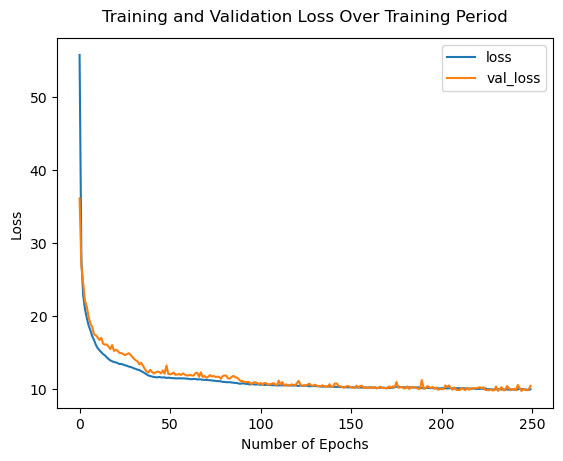

In [419]:
model_df = pd.DataFrame(history.history)
model_df[['loss', 'val_loss']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Training Period", pad=12);

### Accuracy

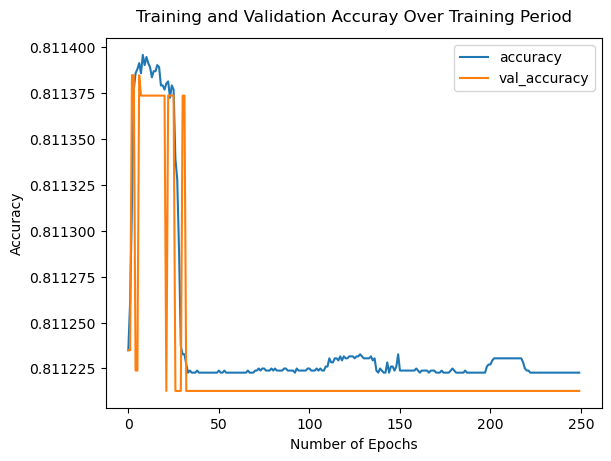

In [420]:
model_df[['accuracy', 'val_accuracy']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuray Over Training Period", pad=12);

### Theory vs Predict

r: 0.89978%, st_er: 0.000909%
y = 0.7959*x + 0.3686


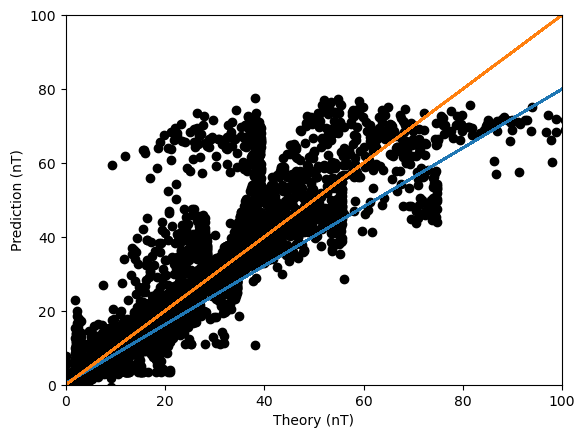

In [421]:
x = y_test.flatten()
y = test_pred.flatten()
m, b, r, p, st_er = stats.linregress(x,y) 

yfit = [b + m * xi for xi in x]
yisx = [0 + 1 * xi for xi in x]
plt.plot(x, yfit)
plt.plot(x, yisx)

plt.scatter(y_test, test_pred,  color='black')
plt.axis([0,100, 0, 100])
plt.xlabel("Theory (nT)")
plt.ylabel("Prediction (nT)")
# print(r, st_er)
print("r: {:.5f}%, st_er: {:.6f}%".format(r, st_er))
print("y = "+str(round(m,4))+"*x + "+str(round(b,4)))

# Output data

In [422]:
df_test['predict'] = test_pred

/var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/ipykernel_34777/4195812830.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predict'] = test_pred


In [423]:
np.savetxt(save_path+"nn.txt", df_test[['i', 'j', 'k', 'predict']], fmt="%i %i %i %s")

In [436]:
df_test

,exp,mini_exp,i,j,k,mean0,mean1,mean2,mean3,mean4,theory,predict,predict2
901120,36,6,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.005976,-0.003226
901121,36,6,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.005976,-0.003226
901122,36,6,0,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.005976,-0.003226
901123,36,6,0,0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.005976,-0.003226
901124,36,6,0,0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.005976,-0.003226
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081339,36,6,43,63,59,0.0,0.0,0.0,0.0,0.0,0.0,0.005976,-0.003226
1081340,36,6,43,63,60,0.0,0.0,0.0,0.0,0.0,0.0,0.005976,-0.003226
1081341,36,6,43,63,61,0.0,0.0,0.0,0.0,0.0,0.0,0.005976,-0.003226
1081342,36,6,43,63,62,0.0,0.0,0.0,0.0,0.0,0.0,0.005976,-0.003226


In [424]:
model2 = keras.Sequential()
model2.add(Dense(7, activation='relu', input_shape=shape)) 
model2.add(Dense(7, activation='relu'))
model2.add(Dense(7, activation='relu'))
model2.add(Dense(7, activation='relu'))
model2.add(Dense(7, activation='relu'))
model2.add(Dense(7, activation='relu'))
model2.add(Dense(1, activation='linear'))
model2.compile(optimizer='adamax', loss='mse', metrics=["accuracy"])

In [425]:
history2 = model2.fit(X_train, y_train, epochs=250, batch_size=64, validation_data=[X_test, y_test])


Epoch 1/250
14080/14080 [==============================] - 16s 1ms/step - loss: 1046.3302 - accuracy: 0.6335 - val_loss: 50.4146 - val_accuracy: 5.5487e-06
Epoch 2/250
14080/14080 [==============================] - 15s 1ms/step - loss: 37.4836 - accuracy: 1.9975e-05 - val_loss: 36.4136 - val_accuracy: 1.6646e-05
Epoch 3/250
14080/14080 [==============================] - 15s 1ms/step - loss: 30.0406 - accuracy: 0.4021 - val_loss: 30.3933 - val_accuracy: 0.8114
Epoch 4/250
14080/14080 [==============================] - 15s 1ms/step - loss: 23.5442 - accuracy: 0.8114 - val_loss: 26.1573 - val_accuracy: 0.8114
Epoch 5/250
14080/14080 [==============================] - 15s 1ms/step - loss: 21.3196 - accuracy: 0.8114 - val_loss: 24.9365 - val_accuracy: 0.8114
Epoch 6/250
14080/14080 [==============================] - 15s 1ms/step - loss: 19.2122 - accuracy: 0.8114 - val_loss: 23.3855 - val_accuracy: 0.8114
Epoch 7/250
14080/14080 [==============================] - 15s 1ms/step - loss: 17.555

14080/14080 [==============================] - 15s 1ms/step - loss: 9.8826 - accuracy: 0.8113 - val_loss: 10.1667 - val_accuracy: 0.8114
Epoch 110/250
14080/14080 [==============================] - 15s 1ms/step - loss: 9.8702 - accuracy: 0.8113 - val_loss: 10.2380 - val_accuracy: 0.8114
Epoch 111/250
14080/14080 [==============================] - 15s 1ms/step - loss: 9.9415 - accuracy: 0.8113 - val_loss: 10.3431 - val_accuracy: 0.8112
Epoch 112/250
14080/14080 [==============================] - 15s 1ms/step - loss: 9.8992 - accuracy: 0.8113 - val_loss: 9.8778 - val_accuracy: 0.8112
Epoch 113/250
14080/14080 [==============================] - 15s 1ms/step - loss: 9.8730 - accuracy: 0.8113 - val_loss: 9.9043 - val_accuracy: 0.8112
Epoch 114/250
14080/14080 [==============================] - 16s 1ms/step - loss: 9.8435 - accuracy: 0.8113 - val_loss: 9.8660 - val_accuracy: 0.8114
Epoch 115/250
14080/14080 [==============================] - 16s 1ms/step - loss: 9.7887 - accuracy: 0.8114 - v

14080/14080 [==============================] - 15s 1ms/step - loss: 9.3218 - accuracy: 0.8112 - val_loss: 9.7826 - val_accuracy: 0.8112
Epoch 218/250
14080/14080 [==============================] - 15s 1ms/step - loss: 9.3371 - accuracy: 0.8112 - val_loss: 9.5755 - val_accuracy: 0.8112
Epoch 219/250
14080/14080 [==============================] - 15s 1ms/step - loss: 9.3799 - accuracy: 0.8112 - val_loss: 9.5253 - val_accuracy: 0.8112
Epoch 220/250
14080/14080 [==============================] - 15s 1ms/step - loss: 9.3626 - accuracy: 0.8112 - val_loss: 9.8951 - val_accuracy: 0.8114
Epoch 221/250
14080/14080 [==============================] - 15s 1ms/step - loss: 9.3454 - accuracy: 0.8112 - val_loss: 9.8686 - val_accuracy: 0.8112
Epoch 222/250
14080/14080 [==============================] - 15s 1ms/step - loss: 9.3895 - accuracy: 0.8112 - val_loss: 9.7116 - val_accuracy: 0.8112
Epoch 223/250
14080/14080 [==============================] - 15s 1ms/step - loss: 9.3628 - accuracy: 0.8112 - val_

In [426]:
train_pred2 = model2.predict(X_train)
print(mse(train_pred2, y_train))
print(mape(train_pred2, y_train))
test_pred2 = model2.predict(X_test)
print(mse(test_pred2, y_test))
print(mape(test_pred2, y_test))

28160/28160 [==============================] - 19s 688us/step
9.358524265784618
1.0455638406507
5632/5632 [==============================] - 4s 684us/step
9.481934435458676
1.0716621402362292


In [427]:
model2.evaluate(X_test, y_test)

5632/5632 [==============================] - 5s 866us/step - loss: 9.4819 - accuracy: 0.8114


[9.481929779052734, 0.8113680481910706]

In [428]:
np.corrcoef(test_pred2.flatten(), y_test)

array([[1.        , 0.90958548],
       [0.90958548, 1.        ]])

In [429]:
model2.summary()

Model: "sequential_367"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1825 (Dense)          (None, 7)                 42        
                                                                 
 dense_1826 (Dense)          (None, 7)                 56        
                                                                 
 dense_1827 (Dense)          (None, 7)                 56        
                                                                 
 dense_1828 (Dense)          (None, 7)                 56        
                                                                 
 dense_1829 (Dense)          (None, 7)                 56        
                                                                 
 dense_1830 (Dense)          (None, 7)                 56        
                                                                 
 dense_1831 (Dense)          (None, 1)              

In [430]:
history2.history

{'loss': [1046.3302001953125,
  37.483638763427734,
  30.040592193603516,
  23.54417610168457,
  21.3195743560791,
  19.2121524810791,
  17.55561065673828,
  16.830585479736328,
  16.048370361328125,
  15.718413352966309,
  15.15301513671875,
  15.153763771057129,
  14.874509811401367,
  14.767585754394531,
  14.562233924865723,
  14.444123268127441,
  14.237424850463867,
  14.06949234008789,
  14.089621543884277,
  13.76307487487793,
  13.555024147033691,
  13.057135581970215,
  12.235762596130371,
  11.770852088928223,
  11.562379837036133,
  11.483296394348145,
  11.319560050964355,
  11.235815048217773,
  11.137860298156738,
  11.024914741516113,
  11.009836196899414,
  10.948224067687988,
  10.913586616516113,
  10.88810920715332,
  10.812581062316895,
  10.799149513244629,
  10.786332130432129,
  10.751015663146973,
  10.730430603027344,
  10.720365524291992,
  10.669264793395996,
  10.594901084899902,
  10.573263168334961,
  10.512391090393066,
  10.481739044189453,
  10.4234876

## Plot

### Loss function (MSE)

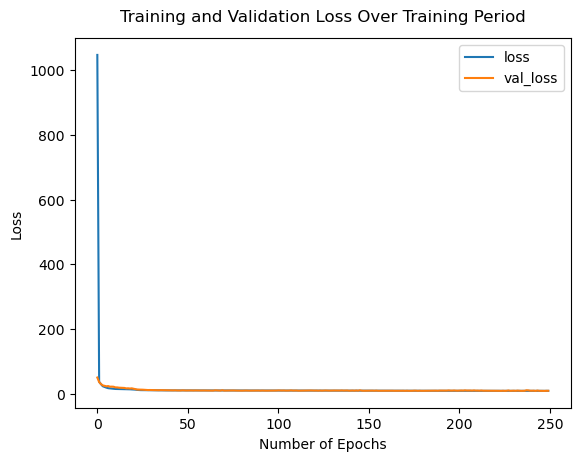

In [431]:
model_df = pd.DataFrame(history2.history)
model_df[['loss', 'val_loss']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Training Period", pad=12);

### Accuracy

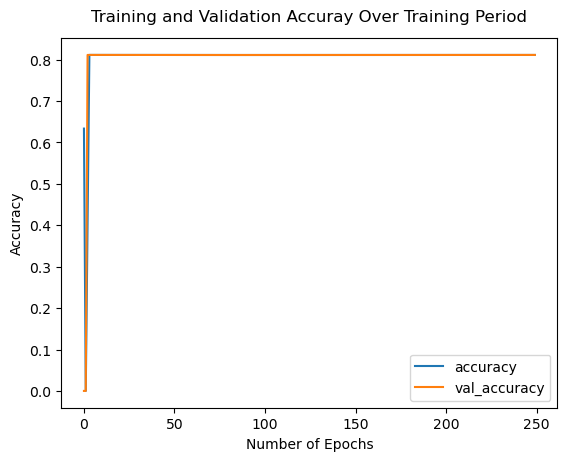

In [432]:
model_df[['accuracy', 'val_accuracy']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuray Over Training Period", pad=12);

### Theory vs Predict

r: 0.90959%, st_er: 0.000871%
y = 0.8097*x + 0.2675


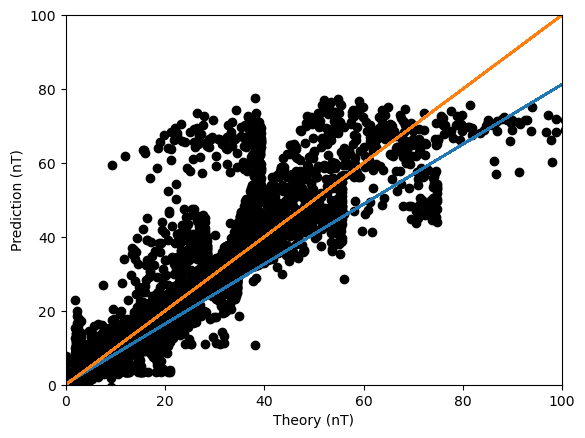

In [433]:
x = y_test.flatten()
y = test_pred2.flatten()
m, b, r, p, st_er = stats.linregress(x,y) 

yfit = [b + m * xi for xi in x]
yisx = [0 + 1 * xi for xi in x]
plt.plot(x, yfit)
plt.plot(x, yisx)

plt.scatter(y_test, test_pred,  color='black')
plt.axis([0,100, 0, 100])
plt.xlabel("Theory (nT)")
plt.ylabel("Prediction (nT)")
# print(r, st_er)
print("r: {:.5f}%, st_er: {:.6f}%".format(r, st_er))
print("y = "+str(round(m,4))+"*x + "+str(round(b,4)))

# Output data

In [434]:
df_test['predict2'] = test_pred2

/var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/ipykernel_34777/3425069941.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predict2'] = test_pred2


In [435]:
np.savetxt(save_path+"nn2.txt", df_test[['i', 'j', 'k', 'predict2']], fmt="%i %i %i %s")

# Old Code

In [157]:
model2 = keras.Sequential()

model2.add(Dense(1, activation='relu', input_shape=(5,)))
model2.add(Dense(1, activation="linear"))

# model2.add(Dense(5, activation='relu', input_shape=(5,)))
# model2.add(Dense(3, activation='relu'))
# model2.add(Dense(1, activation="linear"))
# # Coef 0.7665, MSE 23.21, MAPE 0.9155, Accuracy 0.8112

# model2.add(Dense(20, activation='relu', input_shape=(5,)))
# model2.add(Dense(10, activation='relu'))
# model2.add(Dense(5, activation='relu'))
# model2.add(Dense(1, activation="linear"))
# # Coef 0.7815, MSE 22.56, MAPE 0.9038, Accuracy 0.8112 

# model2.add(Dense(10, activation='relu', input_shape=(5,)))
# model2.add(Dense(10, activation='relu'))
# model2.add(Dense(10, activation='relu'))
# model2.add(Dense(1, activation="linear"))
# # Coef 0.7894, MSE 21.13, MAPE 0.8703, Accuracy 0.8112 => Best

# model2.add(Dense(10, activation='relu', input_shape=(5,)))
# model2.add(Dense(10, activation='relu'))
# model2.add(Dense(1, activation="linear"))
# # Coef 0.7786, MSE 22.19, MAPE 0.8877, Accuracy 0.8112

# model2.add(Dense(20, activation='relu', input_shape=[len(X_train[0])]))
# model2.add(Dense(1))
# # Coef 0.71174903, MSE 28.1933, MAPE 0.9055, Accuracy 0.8114


### BAD ###
# model2.add(Dense(100, activation='relu', input_shape=(5,)))
# model2.add(Dense(50, activation='relu'))
# model2.add(Dense(10, activation='relu'))
# model2.add(Dense(1, activation="linear"))
# # Coef 0.5541, MSE 38.85, MAPE 1.134, Accuracy 0.8112 => Worse

# model2.add(Dense(10, activation='relu', input_shape=(5,)))
# model2.add(Dense(5, activation='relu'))
# model2.add(Dense(3, activation='relu'))
# model2.add(Dense(1, activation="linear"))
# # Coef None, MSE 56.06, MAPE 1.656, Accuracy 5.5487e-06 => Worse

# model2.add(Dense(10, activation='relu', input_shape=(5,)))
# model2.add(Dense(5, activation='relu'))
# model2.add(Dense(1, activation="linear"))
# # Coef 0.7285, MSE 26.74, MAPE 1.5369, Accuracy 0.8114 => Bad

# model2.add(Dense(5, activation='relu', input_shape=[len(X_train[0])]))
# model2.add(Dense(5, activation='relu'))
# model2.add(Dense(5, activation='relu'))
# model2.add(Dense(1))
# # Coef 0.7833, MSE 21.68 MAPE 1.197, Accuracy 0.8112 

model2.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
history2 = model2.fit(X_train, y_train, epochs=100, validation_data=[X_test, y_test], callbacks=myCallbacks)


Epoch 1/100
 9015/28160 [========>.....................] - ETA: 16s - loss: 56.3059 - accuracy: 0.1151

KeyboardInterrupt: 

In [60]:
train_pred2 = model2.predict(X_train)
print(mse(train_pred2, y_train))
print(mape(train_pred2, y_train))
test_pred2 = model2.predict(X_test)
print(mse(test_pred2, y_test))
print(mape(test_pred2, y_test))

28160/28160 [==============================] - 20s 697us/step
11.214849205358673
0.8891644970950675
5632/5632 [==============================] - 4s 680us/step
11.220028543186952
0.9035458755417451


In [106]:
arr = np.corrcoef(test_pred2.flatten(), y_test)

In [108]:
arr

array([[1.        , 0.89192917],
       [0.89192917, 1.        ]])

In [62]:
ev = model2.evaluate(X_test, y_test)

5632/5632 [==============================] - 5s 834us/step - loss: 11.2200 - accuracy: 0.8112


In [72]:
ev[1]

0.8112127184867859

In [364]:
model2.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_127 (Dense)           (None, 10)                60        
                                                                 
 dense_128 (Dense)           (None, 10)                110       
                                                                 
 dense_129 (Dense)           (None, 10)                110       
                                                                 
 dense_130 (Dense)           (None, 1)                 11        
                                                                 
Total params: 291
Trainable params: 291
Non-trainable params: 0
_________________________________________________________________


In [365]:
history2.history

{'loss': [70.53611755371094,
  23.023168563842773,
  22.059120178222656,
  21.485179901123047,
  21.023574829101562,
  21.458295822143555,
  20.747465133666992,
  20.87920379638672,
  20.674291610717773,
  20.560890197753906,
  20.375850677490234],
 'accuracy': [0.8095003962516785,
  0.8013139367103577,
  0.7952991724014282,
  0.7956908941268921,
  0.7943170666694641,
  0.7915316224098206,
  0.8020529747009277,
  0.7983931303024292,
  0.7977461218833923,
  0.8100963234901428,
  0.8075761198997498],
 'val_loss': [31.34503936767578,
  23.02967071533203,
  23.319063186645508,
  22.255678176879883,
  22.685558319091797,
  22.644386291503906,
  22.474851608276367,
  22.245553970336914,
  23.826812744140625,
  23.19800567626953,
  21.347797393798828],
 'val_accuracy': [0.8113847374916077,
  0.8113847374916077,
  0.8113791942596436,
  0.8112071752548218,
  0.8112071752548218,
  0.8112127184867859,
  0.8112071752548218,
  0.8112127184867859,
  0.8112071752548218,
  0.8112127184867859,
  0.8112

## Plot

### Loss function (MSE)

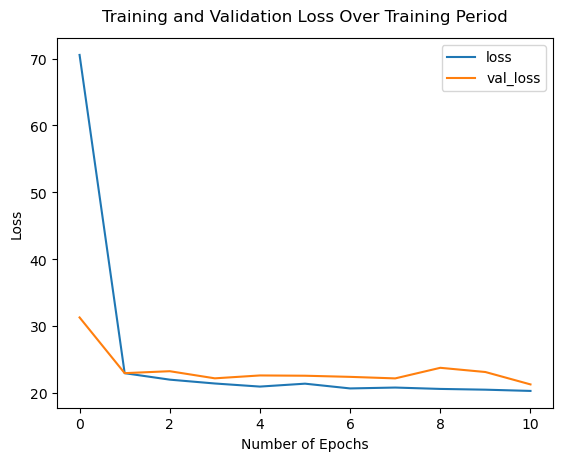

In [391]:
model_df = pd.DataFrame(history2.history)
model_df[['loss', 'val_loss']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Training Period", pad=12);

### Accuracy

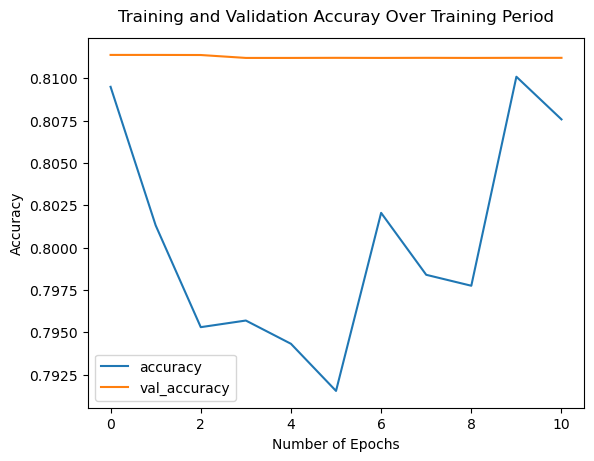

In [392]:
model_df[['accuracy', 'val_accuracy']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuray Over Training Period", pad=12);

### Theory vs Predict

r: 0.78695%, st_er: 0.001142%
y = 0.6185*x + 0.7269


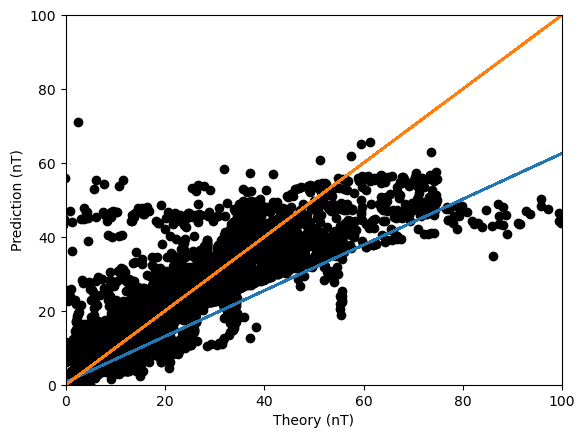

In [393]:
x = y_test.flatten()
y = test_pred2.flatten()
m, b, r, p, st_er = stats.linregress(x,y) 

yfit = [b + m * xi for xi in x]
yisx = [0 + 1 * xi for xi in x]
plt.plot(x, yfit)
plt.plot(x, yisx)

plt.scatter(y_test, test_pred2,  color='black')
plt.axis([0,100, 0, 100])
plt.xlabel("Theory (nT)")
plt.ylabel("Prediction (nT)")
# print(r, st_er)
print("r: {:.5f}%, st_er: {:.6f}%".format(r, st_er))
print("y = "+str(round(m,4))+"*x + "+str(round(b,4)))

# Output data

In [369]:
df_test['predict'] = test_pred2

/var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/ipykernel_82638/3293406254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predict'] = test_pred2


In [370]:
np.savetxt(save_path+"nn.txt", df_test[['i', 'j', 'k', 'predict']], fmt="%i %i %i %s")

# MLPRegressor

In [63]:
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(random_state=1, hidden_layer_sizes = (10,10,10), max_iter=500).fit(X_train, y_train)

In [64]:
regr.score(X_test, y_test)

0.7235479854252406

In [65]:
y_predict = regr.predict(X_test)

In [66]:
np.corrcoef(y_predict,y_test)

array([[1.        , 0.85849349],
       [0.85849349, 1.        ]])

## Data1: fmap means all experiments

In [19]:
X_train = X1_train
y_train = y1_train
X_test = X1_test
y_test = y1_test

In [20]:
model = keras.Sequential()
model.add(Dense(20, activation='relu', input_shape=[len(X_train[0])]))
model.add(Dense(1))
#
model.compile(optimizer= 'adam', loss='mse', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, verbose=0, validation_data=[X_test, y_test])

2022-11-01 01:27:43.648561: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [21]:
train_pred = model.predict(X_train)
print(mse(train_pred, y_train))
test_pred = model.predict(X_test)
print(mse(test_pred, y_test))

70964/70964 [==============================] - 86s 1ms/step
33.924108146617215
30413/30413 [==============================] - 34s 1ms/step
41.300774652323454


In [25]:
r2_score(y_test, test_pred)

0.46228494952999655

In [22]:
model.evaluate(X_test, y_test)

30413/30413 [==============================] - 39s 1ms/step - loss: 41.3007 - accuracy: 0.8084


[41.30071258544922, 0.8084041476249695]

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                120       
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


In [24]:
history.history

{'loss': [122.6025390625,
  43.172542572021484,
  40.16921615600586,
  39.23923110961914,
  38.73468780517578,
  38.396728515625,
  38.045265197753906,
  38.068355560302734,
  37.92721176147461,
  37.775657653808594,
  37.611122131347656,
  37.754947662353516,
  37.0733757019043,
  37.3576774597168,
  37.417701721191406,
  37.15155792236328,
  36.93603515625,
  36.912052154541016,
  36.82124328613281,
  36.67015075683594],
 'accuracy': [0.07773925364017487,
  0.6743738651275635,
  0.805573046207428,
  0.8079113960266113,
  0.8079052567481995,
  0.8079008460044861,
  0.8079017400741577,
  0.8079008460044861,
  0.8078938126564026,
  0.8078986406326294,
  0.8078951239585876,
  0.8079074621200562,
  0.8079149127006531,
  0.807913601398468,
  0.8079113960266113,
  0.8079149127006531,
  0.8079105019569397,
  0.8079056739807129,
  0.807913601398468,
  0.8079153895378113],
 'val_loss': [53.17696762084961,
  44.612735748291016,
  44.086334228515625,
  42.203575134277344,
  42.603248596191406,
 

## Plot

### Loss function (MSE)

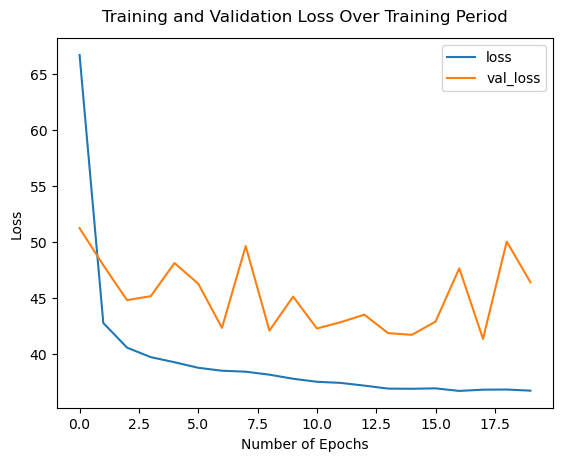

In [95]:
model_df = pd.DataFrame(history.history)
model_df[['loss', 'val_loss']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Training Period", pad=12);

### Accuracy

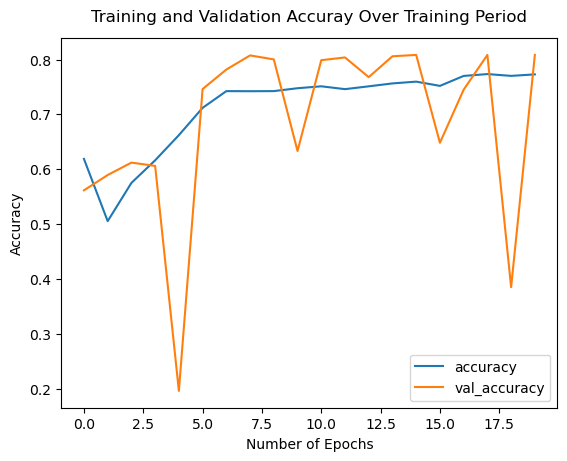

In [96]:
model_df[['accuracy', 'val_accuracy']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuray Over Training Period", pad=12);

### Theory vs Predict

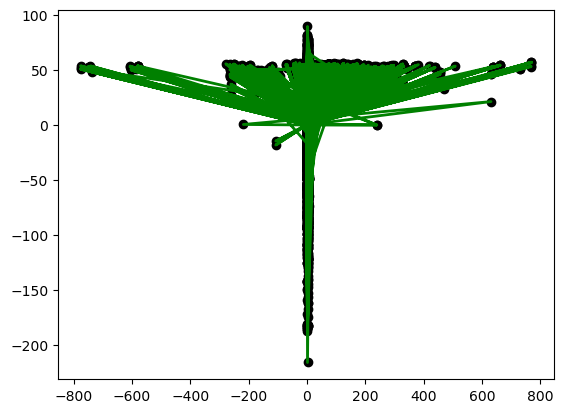

In [97]:
plt.scatter(y_test, test_pred,  color='black')
plt.plot(y_test, test_pred, color='green', linewidth=2)

In [ ]:
acc = (np.sum(y_test == test_pred).astype(np.float) / X_test.shape[0])

print('Test accuracy: %.2f%%' % (acc * 100))

## Data2: One experiment

In [ ]:
X_train = X2_train
y_train = y2_train
X_test = X2_test
y_test = y2_test

In [ ]:
model2 = keras.Sequential()
model2.add(Dense(20, activation='relu', input_shape=[len(X_train[0])]))
model2.add(Dense(1))
#
model2.compile(optimizer= 'adam', loss='mse', metrics=['accuracy'])
history2 = model2.fit(X_train, y_train, epochs=20, verbose=0, validation_data=[X_test, y_test])


In [ ]:
train_pred2 = model2.predict(X_train)
print(mse(train_pred2, y_train))
test_pred2 = model2.predict(X_test)
print(mse(test_pred2, y_test))

In [ ]:
r2_score(y_test, test_pred2)

In [ ]:
model2.evaluate(X_test, y_test)

In [ ]:
model2.summary()

In [ ]:
history2.history

## Data3: 55 fmap means

In [26]:
X_train = X3_train
y_train = y3_train
X_test = X3_test
y_test = y3_test

In [ ]:
model3 = keras.Sequential()
model3.add(Dense(20, activation='relu', input_shape=[len(X_train[0])]))
model3.add(Dense(1))
#
model3.compile(optimizer= 'adam', loss='mse', metrics=['accuracy'])
history3 = model3.fit(X_train, y_train, epochs=20, verbose=0, validation_data=[X_test, y_test])


In [ ]:
train_pred3 = model3.predict(X_train)
print(mse(train_pred3, y_train))
test_pred3 = model3.predict(X_test)
print(mse(test_pred3, y_test))

In [ ]:
r2_score(y_test, test_pred3)

In [ ]:
model3.evaluate(X_test, y_test)

In [ ]:
model3.summary()

In [ ]:
history3.history

## Plot

### Loss function (MSE)

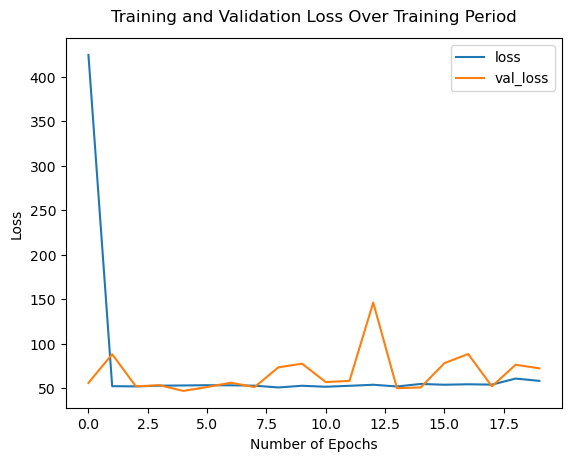

In [39]:
model_df = pd.DataFrame(history3.history)
model_df[['loss', 'val_loss']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Training Period", pad=12);

### Accuracy

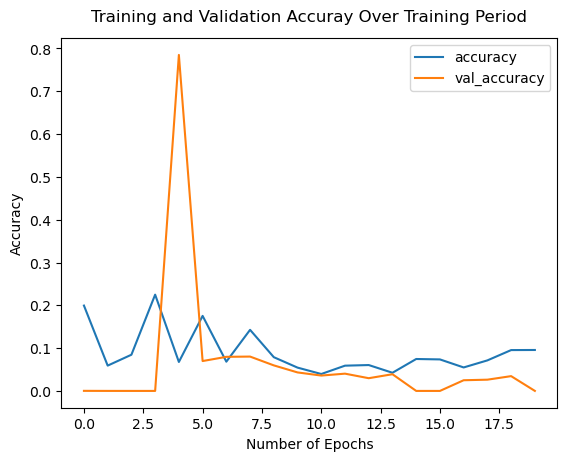

In [40]:
model_df[['accuracy', 'val_accuracy']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuray Over Training Period", pad=12);

### Theory vs Predict

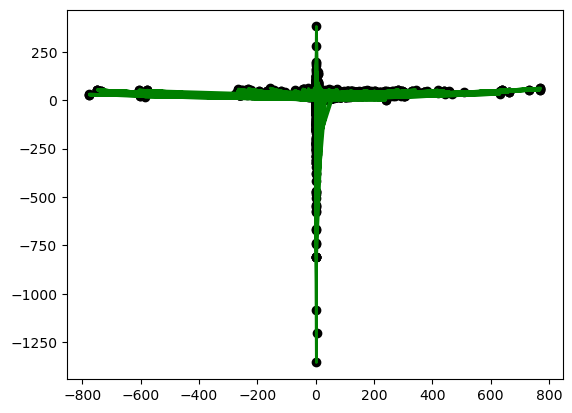

In [41]:
plt.scatter(y_test, test_pred3,  color='black')
plt.plot(y_test, test_pred3, color='green', linewidth=2)

## Data4: None zero

In [39]:
X_train = X4_train
y_train = y4_train
X_test = X4_test
y_test = y4_test

In [28]:
model4 = keras.Sequential()
model4.add(Dense(20, activation='relu', input_shape=[len(X_train[0])]))
model4.add(Dense(1))
#
model4.compile(optimizer= 'adam', loss='mse', metrics=['accuracy'])
history4 = model4.fit(X_train, y_train, epochs=20, validation_data=[X_test, y_test])


2022-10-26 12:02:18.273343: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/20
13623/13623 [==============================] - 17s 1ms/step - loss: 775.6888 - accuracy: 5.0696e-04 - val_loss: 280.3866 - val_accuracy: 9.8486e-04
Epoch 2/20
13623/13623 [==============================] - 16s 1ms/step - loss: 254.4488 - accuracy: 5.9642e-04 - val_loss: 239.9096 - val_accuracy: 4.8173e-05
Epoch 3/20
13623/13623 [==============================] - 16s 1ms/step - loss: 244.3139 - accuracy: 6.0331e-04 - val_loss: 426.1392 - val_accuracy: 0.0011
Epoch 4/20
13623/13623 [==============================] - 16s 1ms/step - loss: 234.7317 - accuracy: 6.1707e-04 - val_loss: 236.3913 - val_accuracy: 8.9922e-04
Epoch 5/20
13623/13623 [==============================] - 17s 1ms/step - loss: 226.6837 - accuracy: 6.7212e-04 - val_loss: 226.9637 - val_accuracy: 9.2063e-04
Epoch 6/20
13623/13623 [==============================] - 16s 1ms/step - loss: 217.3771 - accuracy: 6.9047e-04 - val_loss: 230.2182 - val_accuracy: 1.0705e-04
Epoch 7/20
13623/13623 [==========================

In [29]:
train_pred4 = model4.predict(X_train)
print(mse(train_pred4, y_train))
test_pred4 = model4.predict(X_test)
print(mse(test_pred4, y_test))

13623/13623 [==============================] - 10s 700us/step
184.91616526100555
5839/5839 [==============================] - 4s 672us/step
199.72171091691504


In [30]:
model4.evaluate(X_test, y_test)

5839/5839 [==============================] - 5s 777us/step - loss: 199.7217 - accuracy: 9.0458e-04


[199.72171020507812, 0.0009045753395184875]

In [31]:
model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                120       
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


In [32]:
history4.history

{'loss': [775.6888427734375,
  254.44879150390625,
  244.31385803222656,
  234.73170471191406,
  226.68370056152344,
  217.37705993652344,
  211.0164031982422,
  206.1196746826172,
  198.62127685546875,
  194.85061645507812,
  192.2696990966797,
  189.657470703125,
  189.12733459472656,
  187.17984008789062,
  187.6508331298828,
  186.62896728515625,
  186.11622619628906,
  185.31565856933594,
  184.93045043945312,
  184.64312744140625],
 'accuracy': [0.0005069597973488271,
  0.00059642328415066,
  0.0006033051176927984,
  0.0006170687265694141,
  0.0006721231620758772,
  0.0006904746405780315,
  0.0007202958222478628,
  0.0007019443437457085,
  0.0006812989013269544,
  0.0006124808569438756,
  0.0005207234062254429,
  0.0004725507751572877,
  0.0004174963105469942,
  0.0004129084409214556,
  0.00044731746311299503,
  0.0004886083188466728,
  0.00043584778904914856,
  0.0004771386447828263,
  0.00044731746311299503,
  0.00044731746311299503],
 'val_loss': [280.3866271972656,
  239.9096

## Plot

### Loss function (MSE)

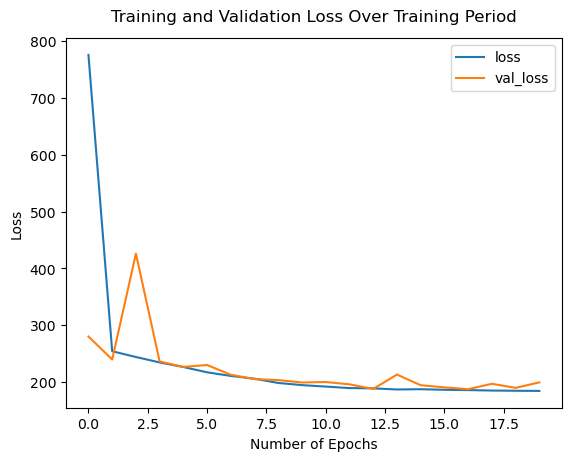

In [33]:
model_df = pd.DataFrame(history4.history)
model_df[['loss', 'val_loss']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Training Period", pad=12);

### Accuracy

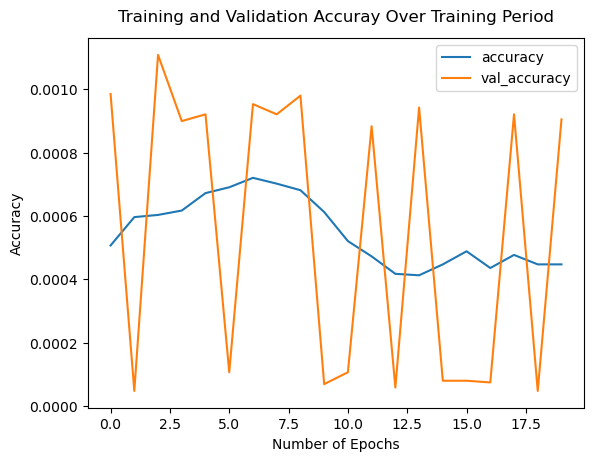

In [34]:
model_df[['accuracy', 'val_accuracy']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuray Over Training Period", pad=12);

### Theory vs Predict

r: 0.55524%, st_er: 0.001131%
y = 0.3264*x + 7.3193


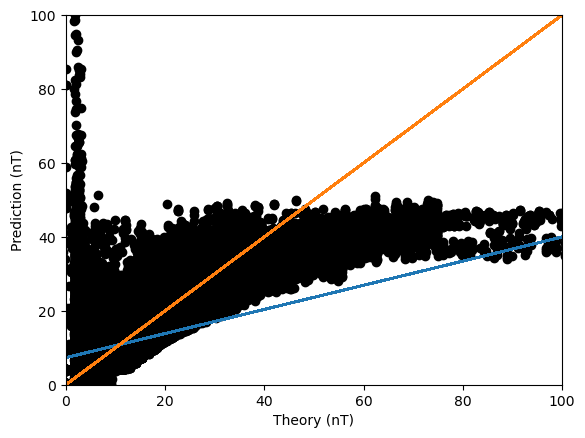

In [42]:
x = y_test.flatten()
y = test_pred4.flatten()
m, b, r, p, st_er = stats.linregress(x,y) 

yfit = [b + m * xi for xi in x]
yisx = [0 + 1 * xi for xi in x]
plt.plot(x, yfit)
plt.plot(x, yisx)

plt.scatter(y_test, test_pred4,  color='black')
plt.axis([0,100, 0, 100])
plt.xlabel("Theory (nT)")
plt.ylabel("Prediction (nT)")
# print(r, st_er)
print("r: {:.5f}%, st_er: {:.6f}%".format(r, st_er))
print("y = "+str(round(m,4))+"*x + "+str(round(b,4)))

# Output image data

In [115]:
df['predict'] = test_pred
df_test['predict'] = test_pred2
df_55['predict'] = test_pred3
df_on['predict'] = test_pred4

/var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/ipykernel_3032/2079570890.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predict'] = test_pred
/var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/ipykernel_3032/2079570890.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predict2'] = test_pred2


In [116]:
np.savetxt(save_path+"nn.txt", df[['i', 'j', 'k', 'predict']], fmt="%i %i %i %s")

In [117]:
np.savetxt(save_path+"nn2.txt", df_test[['i', 'j', 'k', 'predict']], fmt="%i %i %i %s")

In [ ]:
np.savetxt(save_path+"nn3.txt", df_55[['i', 'j', 'k', 'predict']], fmt="%i %i %i %s")

In [ ]:
np.savetxt(save_path+"nn4.txt", df_on[['i', 'j', 'k', 'predict']], fmt="%i %i %i %s")